# Build a model to predict the price of a Car.





# Objective: -

Buying a new car is everyone's dreams.Having a Car gives many advantages:
1. The Convenience
2. Have Your Own Freedom
3. Can Take Road Trips
4. Saves Time
5. Great for Families
6. Shows Responsibility

Purchasing car require lot of money and understanding about the use of cars and its mechanics. Everyone faces difficulty in selecting appropriate and reasonable cars.The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more.  

The goal of this challenge is to build a machine learning model that predicts the price of a car with the help of various features.Further accurate prediction of car price will help the customer to analyze the price of various cars and select the most appropriate for them according to their budget.

# Dataset: -

The dataset used in this model is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA.

Attribute Information:
1. Price 

**Twenty five real-valued features:**

1) Car_ID : Unique id of each observation (Interger)
2) Symboling : Its assigned insurance risk rating, A value of +3 - Indicates that the auto is risky, -3 that it is probably pretty safe.
3) carCompany : Name of car company (Categorical)
4) fueltype : Car fuel type i.e gas or diesel (Categorical)
5) aspiration : Aspiration used in a car (Categorical)
6) doornumber : Number of doors in a car (Categorical)
7) carbody : body of car (Categorical)
8) drivewheel : type of drive wheel (Categorical)
9) enginelocation : Location of car engine (Categorical)
10) wheelbase : Weelbase of car (Numeric)
11) carlength : Length of car (Numeric)
12) carwidth : Width of car (Numeric)
13) carheight : height of car (Numeric)
14) curbweight : The weight of a car without occupants or baggage. (Numeric)
15) enginetype : Type of engine. (Categorical)
16) cylindernumber : cylinder placed in the car (Categorical)
17) enginesize : Size of car (Numeric)
18) fuelsystem : Fuel system of car (Categorical)
19) boreratio : Boreratio of car (Numeric)
20) stroke : Stroke or volume inside the engine (Numeric)
21) compressionratio : compression ratio of car (Numeric)
22) horsepower : Horsepower (Numeric)
23) peakrpm : car peak rpm (Numeric)
24) citympg : Mileage in city (Numeric)
25) highwaympg : Mileage on highway (Numeric)


# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [110]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score

import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [111]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/Car Price Prediction/data/CarPrice.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [112]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

By analysing the first five rows we found that there is a column named car_ID,it only shows the serial number so it is not helpful for us so we will drop it.

In [113]:
df = df.drop(['car_ID'], axis =1)

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

After we read the data, we can look at the data using:

In [114]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 205 rows and 25 columns


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [115]:
df.shape

(205, 25)

#### The df.shape method shows the shape of the dataset. 

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [117]:
df.iloc[1]

symboling                             3
CarName             alfa-romero stelvio
fueltype                            gas
aspiration                          std
doornumber                          two
carbody                     convertible
drivewheel                          rwd
enginelocation                    front
wheelbase                          88.6
carlength                         168.8
carwidth                           64.1
carheight                          48.8
curbweight                         2548
enginetype                         dohc
cylindernumber                     four
enginesize                          130
fuelsystem                         mpfi
boreratio                          3.47
stroke                             2.68
compressionratio                    9.0
horsepower                          111
peakrpm                            5000
citympg                              21
highwaympg                           27
price                           16500.0


####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [118]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [119]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  10
There names are as follows:  ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [120]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [121]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  7
There names are as follows:  ['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [122]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [123]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  8
There name are as follow:  ['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'price']


## Step 2 Insights: -

1) We have total 23 features where 10 of them are object type and 7 are integer type while others are float type.
2) Drop "car_ID" columns.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [124]:
df.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

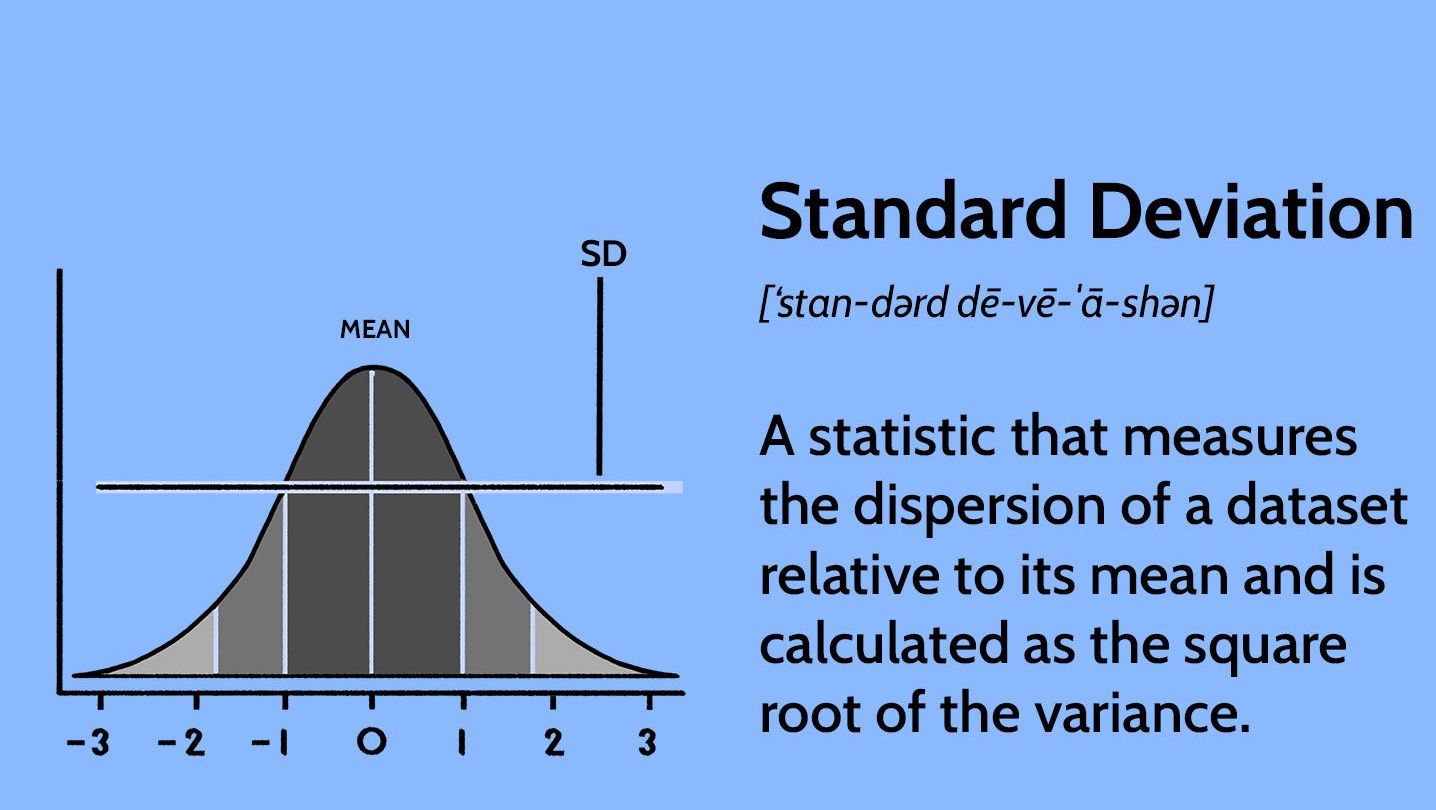

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [125]:
df.std()

symboling              1.245307
wheelbase              6.021776
carlength             12.337289
carwidth               2.145204
carheight              2.443522
curbweight           520.680204
enginesize            41.642693
boreratio              0.270844
stroke                 0.313597
compressionratio       3.972040
horsepower            39.544167
peakrpm              476.985643
citympg                6.542142
highwaympg             6.886443
price               7988.852332
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [126]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [127]:
std_cal(df, float64_lst)

normal_value  zero_value
0             8           0

In [128]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

normal_value  zero_value
0             7           0

zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

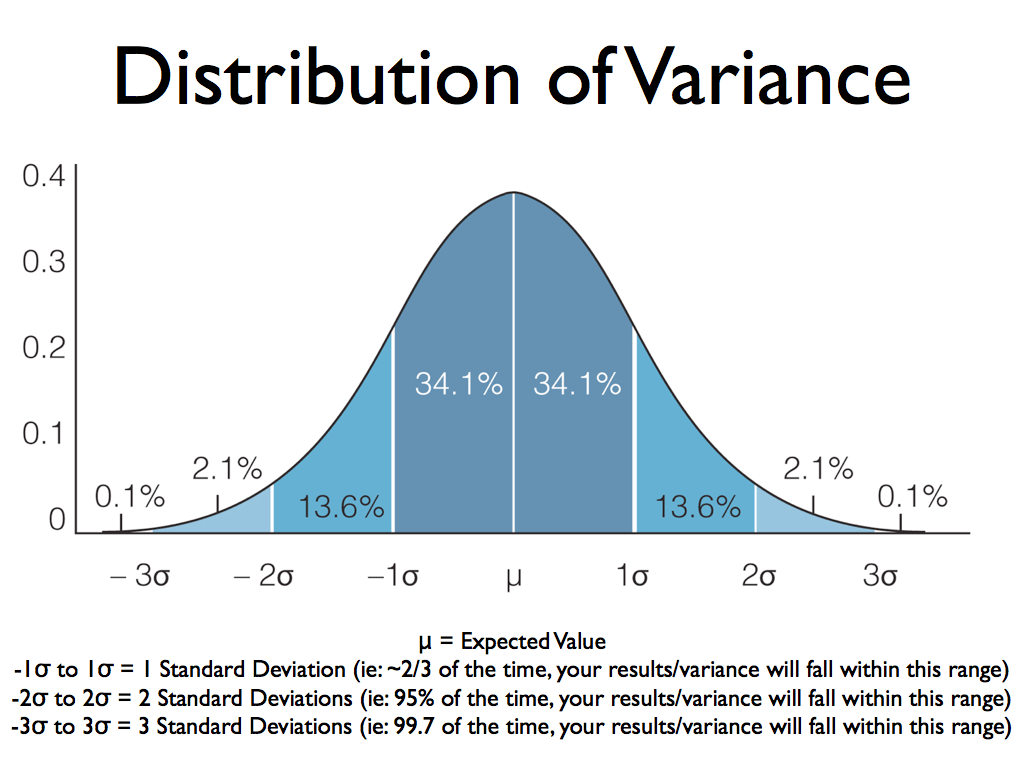

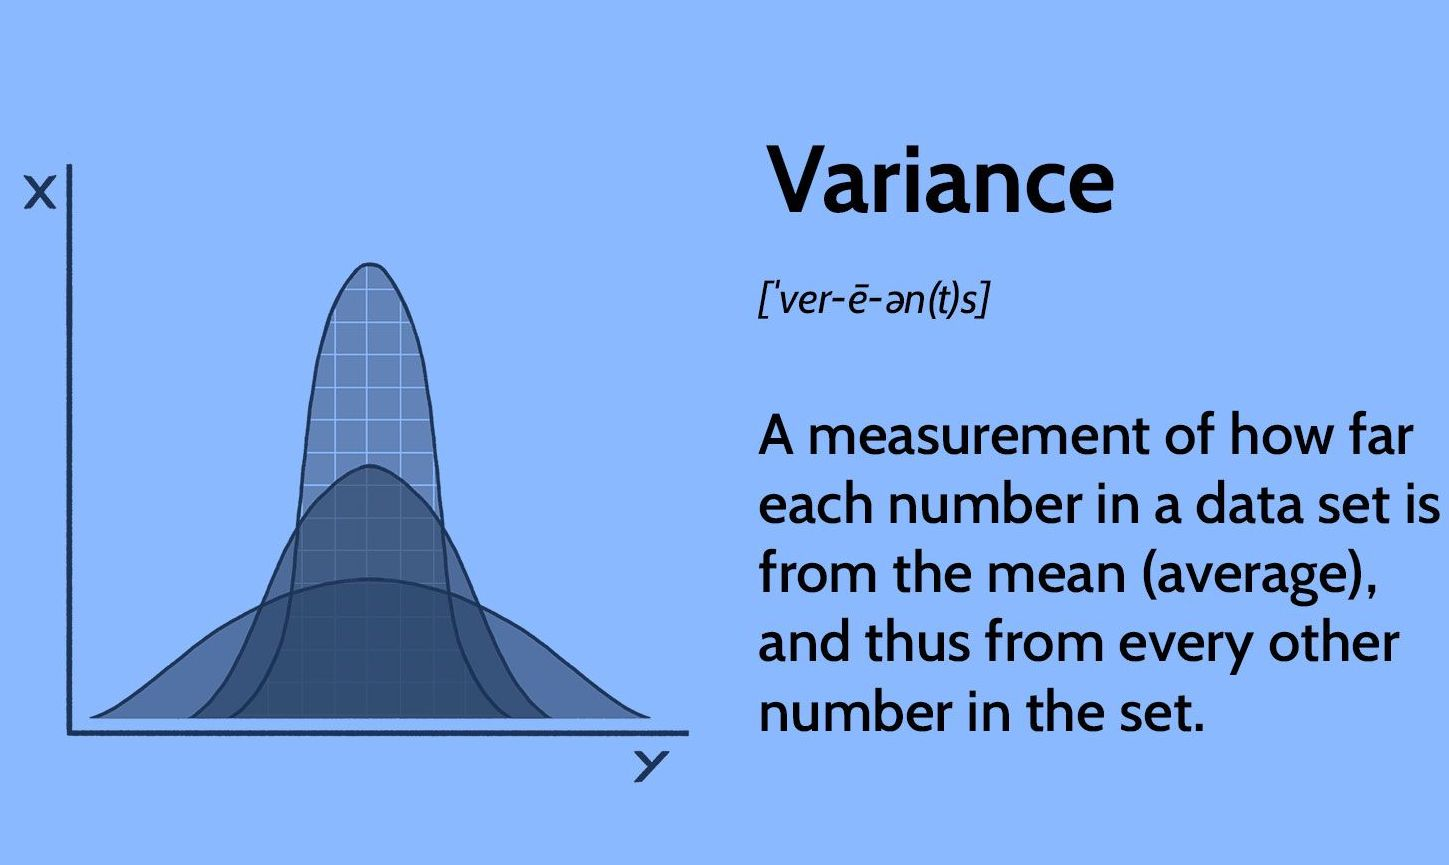

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [129]:
df.var()

symboling           1.550789e+00
wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335631e-02
stroke              9.834309e-02
compressionratio    1.577710e+01
horsepower          1.563741e+03
peakrpm             2.275153e+05
citympg             4.279962e+01
highwaympg          4.742310e+01
price               6.382176e+07
dtype: float64

#### We can also understand the Variance using the below function.

In [130]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [131]:
var_cal(df, float64_lst)

normal_value  zero_value
0             8           0

In [132]:
var_cal(df, int64_lst)

normal_value  zero_value
0             7           0

zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

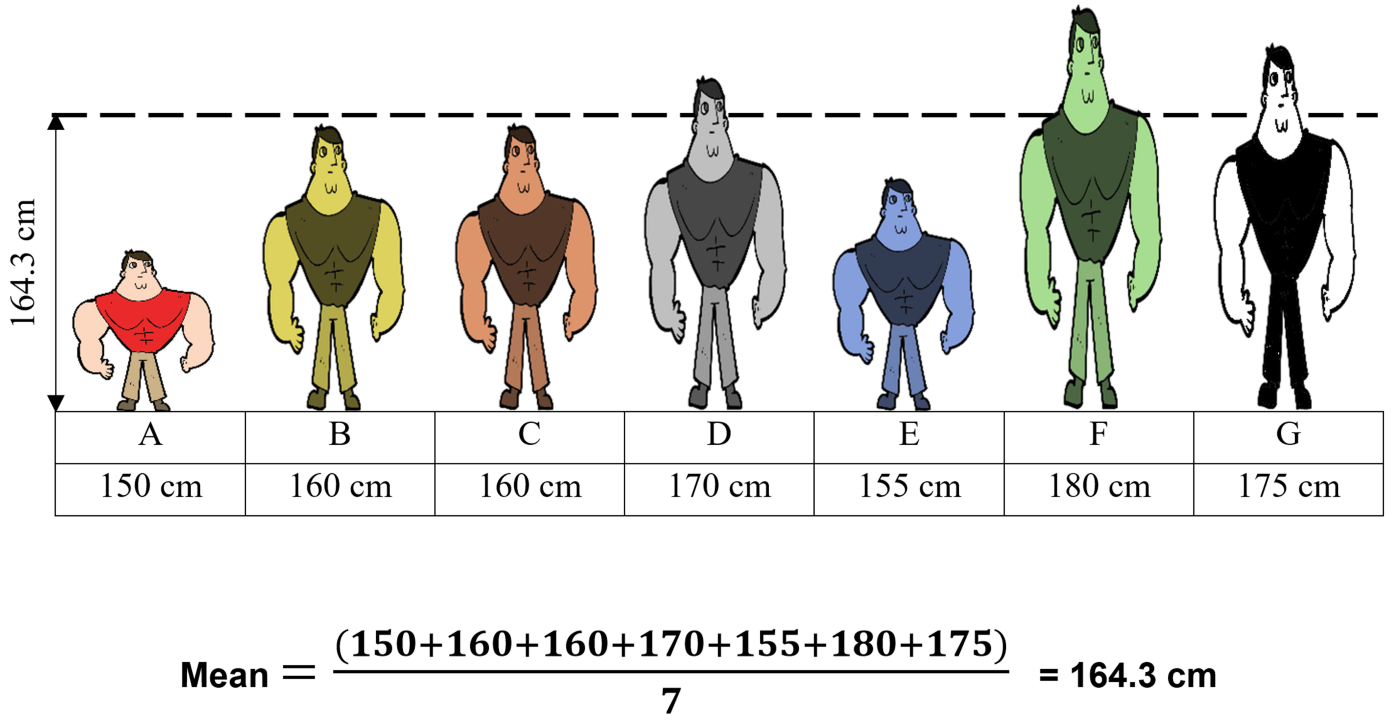

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [133]:
df.mean()

symboling               0.834146
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64

#### We can also understand the mean using the below function. 

In [134]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [135]:
mean_cal(df, int64_lst)

normal_value  zero_value
0             7           0

In [136]:
mean_cal(df,float64_lst)

normal_value  zero_value
0             8           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
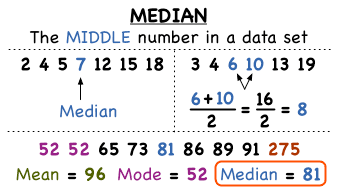

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [137]:
df.median()

symboling               1.00
wheelbase              97.00
carlength             173.20
carwidth               65.50
carheight              54.10
curbweight           2414.00
enginesize            120.00
boreratio               3.31
stroke                  3.29
compressionratio        9.00
horsepower             95.00
peakrpm              5200.00
citympg                24.00
highwaympg             30.00
price               10295.00
dtype: float64

####  We can also understand the median using the below function. 

In [138]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [139]:
median_cal(df, float64_lst)

normal_value  zero_value
0             8           0

zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
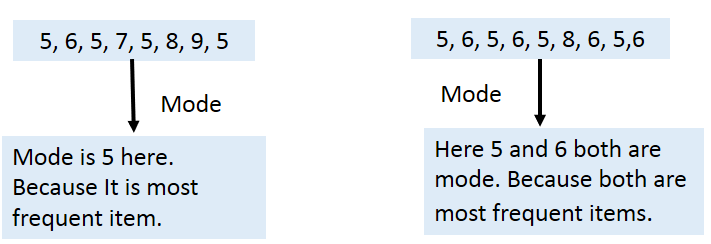
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [140]:
df.mode()

symboling         CarName fueltype aspiration doornumber carbody  \
0         0.0     peugeot 504      gas        std       four   sedan   
1         NaN  toyota corolla      NaN        NaN        NaN     NaN   
2         NaN   toyota corona      NaN        NaN        NaN     NaN   
3         NaN             NaN      NaN        NaN        NaN     NaN   
4         NaN             NaN      NaN        NaN        NaN     NaN   
5         NaN             NaN      NaN        NaN        NaN     NaN   
6         NaN             NaN      NaN        NaN        NaN     NaN   
7         NaN             NaN      NaN        NaN        NaN     NaN   
8         NaN             NaN      NaN        NaN        NaN     NaN   
9         NaN             NaN      NaN        NaN        NaN     NaN   
10        NaN             NaN      NaN        NaN        NaN     NaN   
11        NaN             NaN      NaN        NaN        NaN     NaN   
12        NaN             NaN      NaN        NaN        NaN     NaN   
13        NaN             NaN      NaN        NaN        NaN     NaN   
14        NaN             NaN      NaN        NaN        NaN     NaN   
15        NaN             NaN      NaN        NaN        NaN     NaN   

   drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
0         fwd          front       94.5      157.3  ...        92.0   
1         NaN            NaN        NaN        NaN  ...       122.0   
2         NaN            NaN        NaN        NaN  ...         NaN   
3         NaN            NaN        NaN        NaN  ...         NaN   
4         NaN            NaN        NaN        NaN  ...         NaN   
5         NaN            NaN        NaN        NaN  ...         NaN   
6         NaN            NaN        NaN        NaN  ...         NaN   
7         NaN            NaN        NaN        NaN  ...         NaN   
8         NaN            NaN        NaN        NaN  ...         NaN   
9         NaN            NaN        NaN        NaN  ...         NaN   
10        NaN            NaN        NaN        NaN  ...         NaN   
11        NaN            NaN        NaN        NaN  ...         NaN   
12        NaN            NaN        NaN        NaN  ...         NaN   
13        NaN            NaN        NaN        NaN  ...         NaN   
14        NaN            NaN        NaN        NaN  ...         NaN   
15        NaN            NaN        NaN        NaN  ...         NaN   

    fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
0         mpfi       3.62    3.4              9.0        68.0  5500.0   
1          NaN        NaN    NaN              NaN         NaN     NaN   
2          NaN        NaN    NaN              NaN         NaN     NaN   
3          NaN        NaN    NaN              NaN         NaN     NaN   
4          NaN        NaN    NaN              NaN         NaN     NaN   
5          NaN        NaN    NaN              NaN         NaN     NaN   
6          NaN        NaN    NaN              NaN         NaN     NaN   
7          NaN        NaN    NaN              NaN         NaN     NaN   
8          NaN        NaN    NaN              NaN         NaN     NaN   
9          NaN        NaN    NaN              NaN         NaN     NaN   
10         NaN        NaN    NaN              NaN         NaN     NaN   
11         NaN        NaN    NaN              NaN         NaN     NaN   
12         NaN        NaN    NaN              NaN         NaN     NaN   
13         NaN        NaN    NaN              NaN         NaN     NaN   
14         NaN        NaN    NaN              NaN         NaN     NaN   
15         NaN        NaN    NaN              NaN         NaN     NaN   

    citympg  highwaympg    price  
0      31.0        25.0   5572.0  
1       NaN         NaN   6229.0  
2       NaN         NaN   6692.0  
3       NaN         NaN   7295.0  
4       NaN         NaN   7609.0  
5       NaN         NaN   7775.0  
6       NaN         NaN   7898.0  
7       NaN         NaN   7957.0  
8       NaN   

In [141]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [142]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0             8           0             0

zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


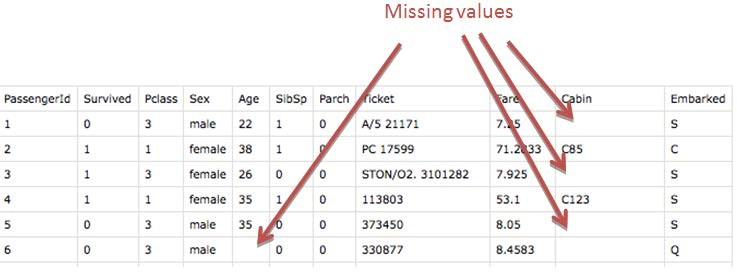

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [143]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

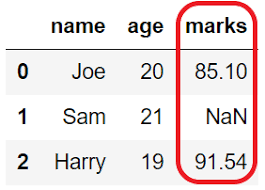

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [144]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [145]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

CarName    toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
fueltype   gas       185
diesel     20
Name: fueltype, dtype: int64
aspiration std      168
turbo     37
Name: aspiration, dtype: int64
doornumber four    115
two      90
Name: doornumber, dtype: int64
carbody    sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
drivewheel fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
enginelocation front    202
rear       3
Name: enginelocation, dtype: int64
enginetype ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
cylindernumber four      159
six        24
five

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

Text(0.5, 1.0, 'fuel type')

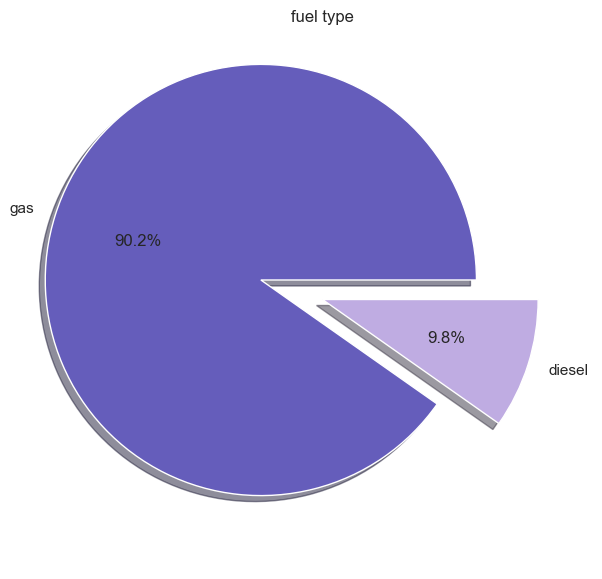

In [146]:
myexplode = [0.3, 0]
plt.figure(figsize=[7,7])
plt.pie(df['fueltype'].value_counts(),labels=['gas', 'diesel'],autopct='%1.1f%%',shadow=True,explode=myexplode,colors=['#655DBB','#BFACE2'])
plt.title('fuel type')

### 90.2% (185)of the cars have gas(petrol) engines and very few about 9.8% (20) of the cars have a diesel engine. 

<AxesSubplot: xlabel='aspiration', ylabel='price'>

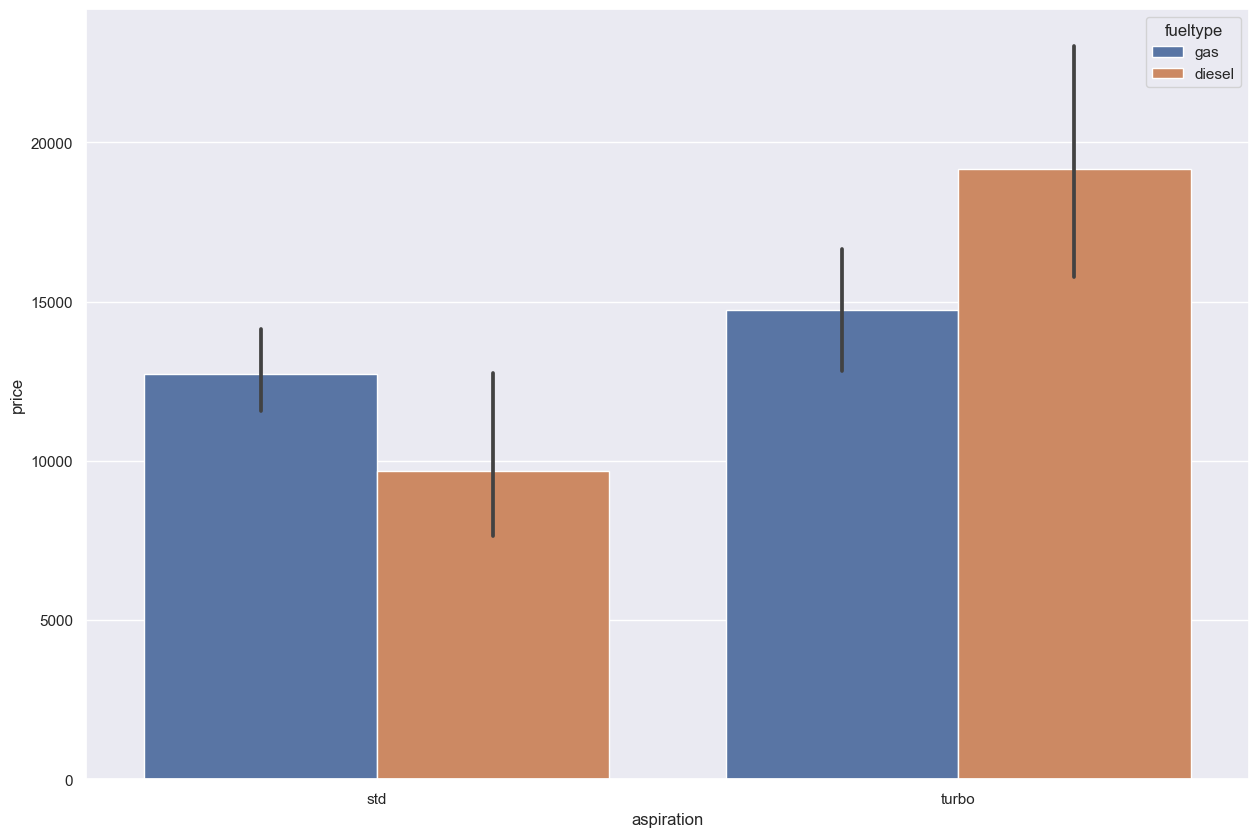

In [147]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x='aspiration',y='price',hue='fueltype',data=df)

### Turbo engines with diesel have more price than gas.

<AxesSubplot: xlabel='price', ylabel='Count'>

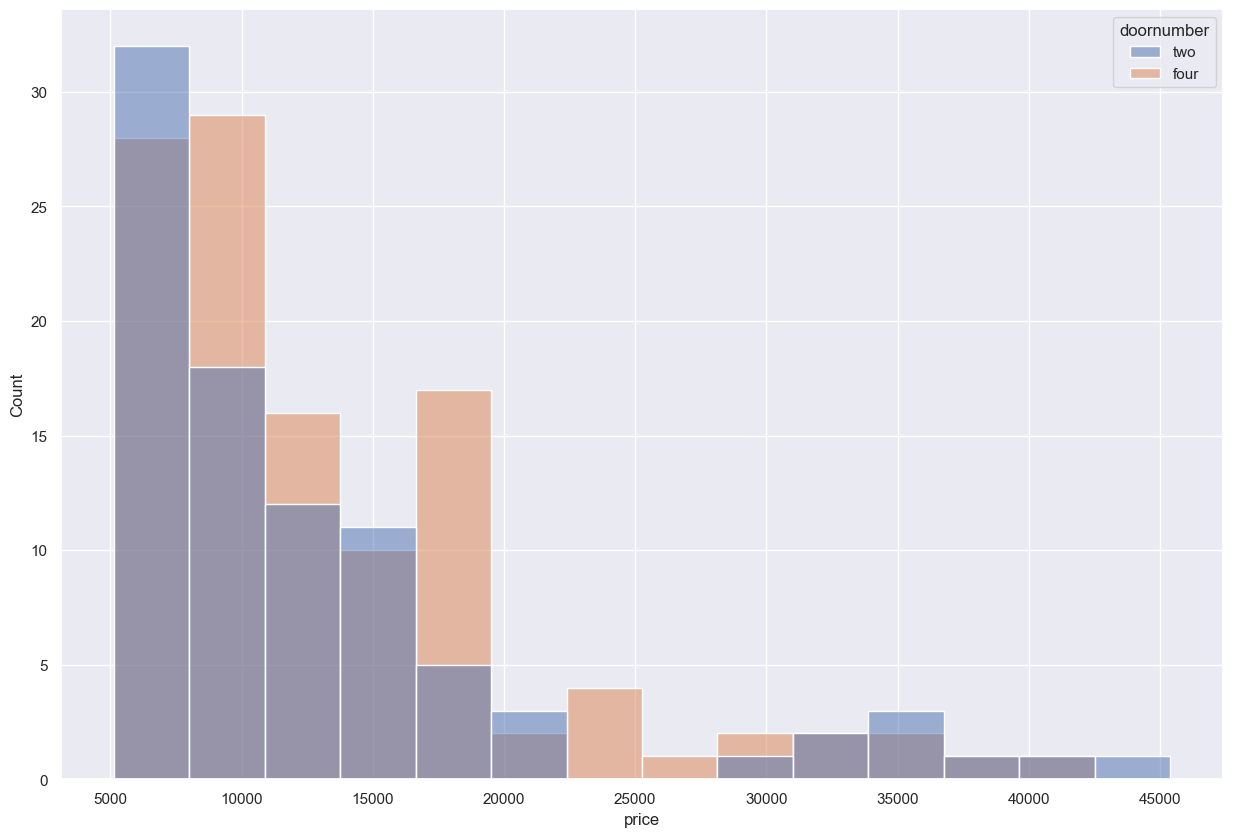

In [148]:
sns.histplot(hue='doornumber',x='price',data=df)

### Cheaper cars come with both-door options (2,4), but as the price gets increases it is left with only 2-door options mostly if you look at a price more than average there are 30 cars with two doors and 46 cars with 4 doors 

<AxesSubplot: xlabel='carbody', ylabel='count'>

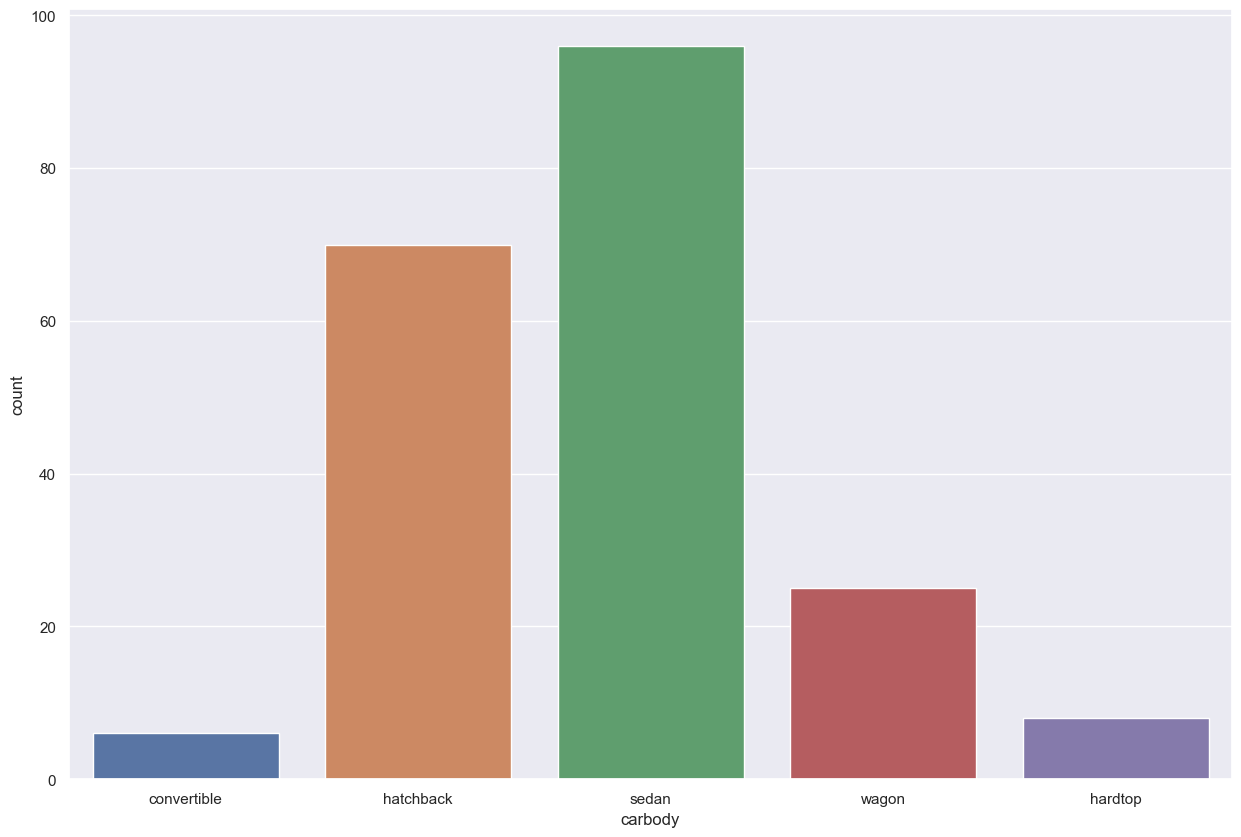

In [149]:
sns.countplot(x='carbody',data=df)

### Sedan are common body type as compared to other body types
### If the CAR PRICE increase by more than 15000 you are left with two body types only (convertible, hardtop)

([<matplotlib.patches.Wedge at 0x1e0454f4c90>,
 [Text(-0.29147957975199507, 1.060678864966961, 'fwd'),
  Text(0.1428822671576364, -1.0906808230329779, 'rwd'),
  Text(1.1886043149086132, -0.1649841888807122, '4wd')],
 [Text(-0.15898886168290638, 0.5785521081637968, '58.5%'),
  Text(0.07793578208598348, -0.5949168125634424, '37.1%'),
  Text(0.6933525170300243, -0.0962407768470821, '4.4%')])

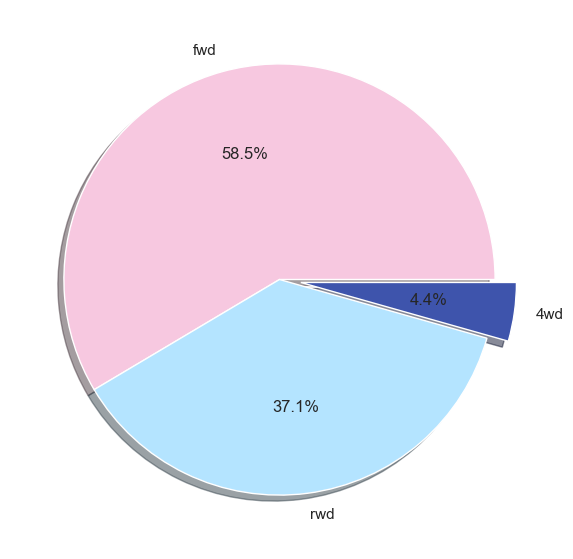

In [150]:
z=df['drivewheel'].value_counts()
myexplode = [0, 0,0.1]
plt.figure(figsize=[7,7])
plt.pie(z,labels=['fwd', 'rwd','4wd'],autopct='%1.1f%%',shadow=True,explode=myexplode,colors=['#F7C8E0','#B4E4FF','#3E54AC'])

### Front wheel drive is more in the count and most of the car engine are located at the front minimal cars have engine at the back

Text(0.5, 1.0, 'fuel type')

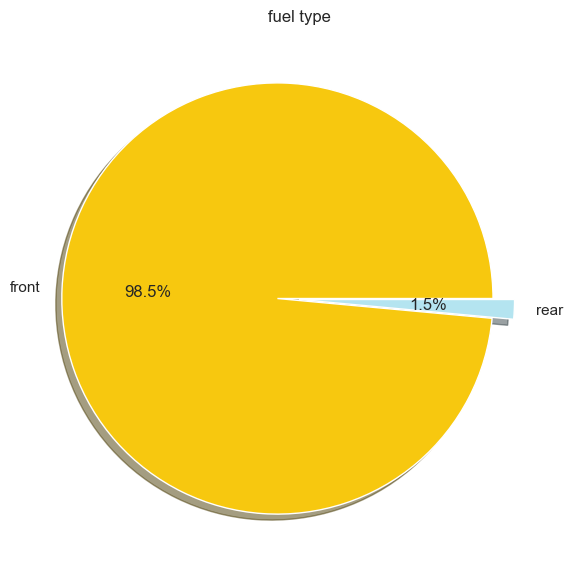

In [151]:
myexplode = [0.1, 0]
plt.figure(figsize=[7,7])
plt.pie(df['enginelocation'].value_counts(),labels=['front', 'rear'],autopct='%1.1f%%',shadow=True,explode=myexplode,colors=['#F7C80f','#B4E4F0'])
plt.title('fuel type')

### MPFI(multi-point fuel injection) is the common fuel system in cars and is available in any price range. IDI(Indirect injection in) is another mostly used engine system.

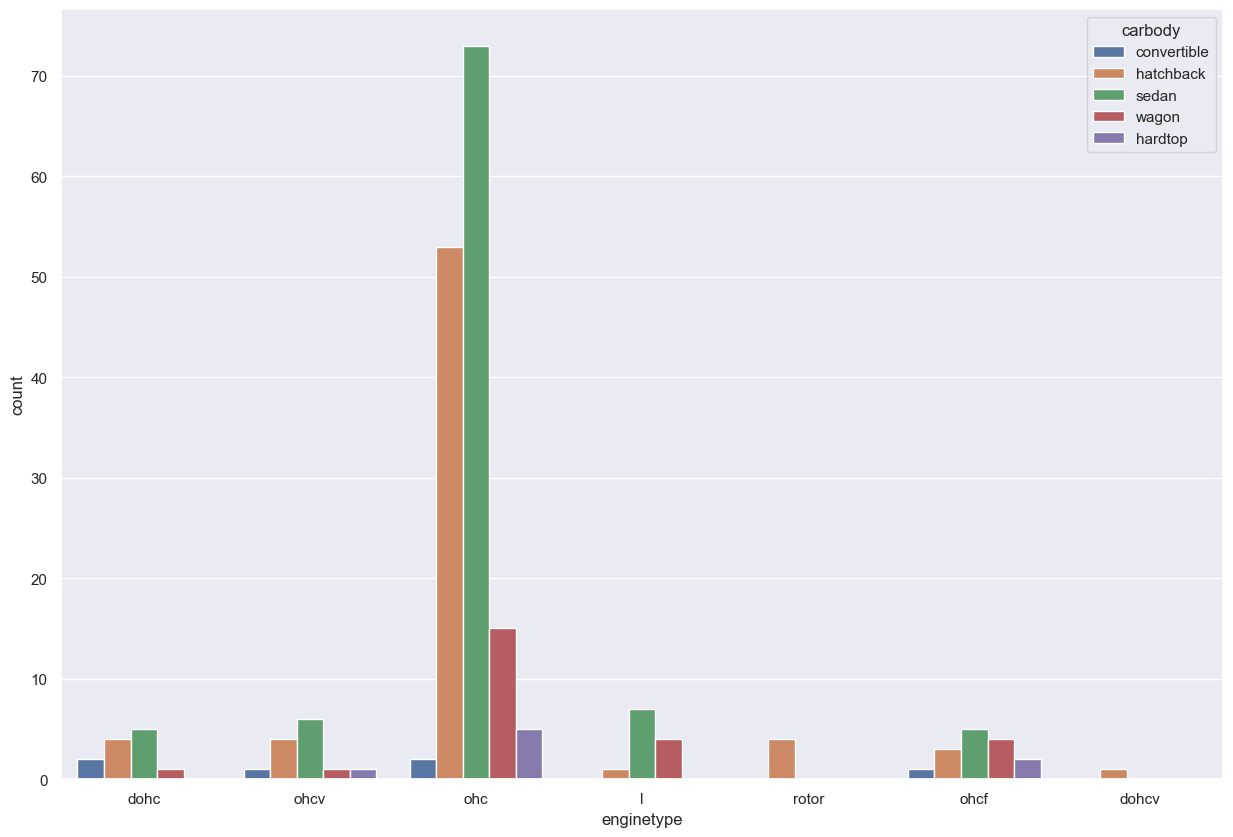

In [152]:
sns.countplot(x='enginetype',hue='carbody',data=df)
plt.show()

### Overhead camshaft engine(ohc) is a common engine type that comes with all car bodies  

### Insights:-

- Safe cars are costly as compared to other cars

- Wheelbase directly affects the car length the increases the price but most of the cars come under the normal price range.

- Cars' width effect with engine size. and price increase with horsepower and engine size there is no such effect on peak rpm most of the cars under 20000 have good peak rpm

- Average or less than average engine size has very good peak rpm. but

- Most of the cars come with 4 number of cylinders

- City or highway mpg gradually decreases with engine size increase, an increase in engine size decreases mileage.

In [153]:
#Before Encoding
a = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for i in a:
    print(df[i])

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object
0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object
0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object
0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: doornumber, Length: 205, dtype: object
0      convertible
1      convertible
2     

In [154]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.CarName = le.fit_transform(df.CarName)
df.fueltype = le.fit_transform(df.fueltype)
df.aspiration = le.fit_transform(df.aspiration)
df.doornumber = le.fit_transform(df.doornumber)
df.carbody = le.fit_transform(df.carbody)
df.drivewheel = le.fit_transform(df.drivewheel)
df.enginelocation = le.fit_transform(df.enginelocation)
df.enginetype = le.fit_transform(df.enginetype)
df.cylindernumber = le.fit_transform(df.cylindernumber)
df.fuelsystem = le.fit_transform(df.fuelsystem)
    

In [155]:
#After encoding or converting categorical col values into numbers
for i in a:
    print(df[i])

0        2
1        3
2        1
3        4
4        5
      ... 
200    139
201    138
202    140
203    142
204    143
Name: CarName, Length: 205, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fueltype, Length: 205, dtype: int32
0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    1
202    0
203    1
204    1
Name: aspiration, Length: 205, dtype: int32
0      1
1      1
2      1
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: doornumber, Length: 205, dtype: int32
0      0
1      0
2      2
3      3
4      3
      ..
200    3
201    3
202    3
203    3
204    3
Name: carbody, Length: 205, dtype: int32
0      2
1      2
2      2
3      1
4      0
      ..
200    2
201    2
202    2
203    2
204    2
Name: drivewheel, Length: 205, dtype: int32
0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: enginelocation, Length:

# Skewness 

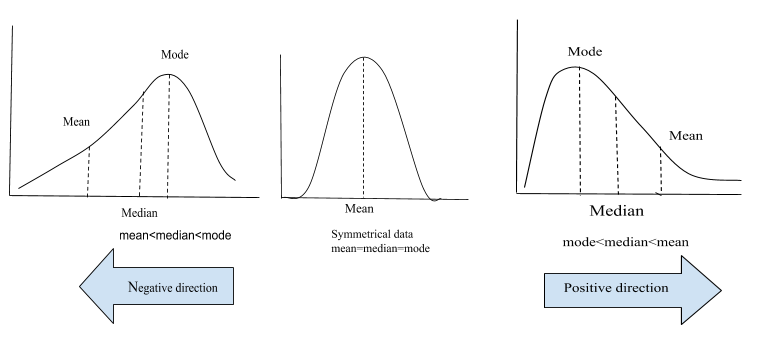

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [156]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [157]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [158]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0         wheelbase          1.0502  positive (+ve) skewed
1         carlength          0.1560  positive (+ve) skewed
2          carwidth          0.9040  positive (+ve) skewed
3         carheight          0.0631  positive (+ve) skewed
4         boreratio          0.0202  positive (+ve) skewed
5            stroke         -0.6897  negative (-ve) skewed
6  compressionratio          2.6109  positive (+ve) skewed
7             price          1.7777  positive (+ve) skewed

In [159]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      7                   0                      1

In [160]:
columns = df.columns.tolist()
for i in columns:
    if df[i].skew()>0:
        print(f"{i} : Positive skewed")
    else:
        print(f"{i} : Negative skewed")
   

symboling : Positive skewed
CarName : Negative skewed
fueltype : Negative skewed
aspiration : Positive skewed
doornumber : Positive skewed
carbody : Negative skewed
drivewheel : Negative skewed
enginelocation : Positive skewed
wheelbase : Positive skewed
carlength : Positive skewed
carwidth : Positive skewed
carheight : Positive skewed
curbweight : Positive skewed
enginetype : Negative skewed
cylindernumber : Positive skewed
enginesize : Positive skewed
fuelsystem : Negative skewed
boreratio : Positive skewed
stroke : Negative skewed
compressionratio : Positive skewed
horsepower : Positive skewed
peakrpm : Positive skewed
citympg : Positive skewed
highwaympg : Positive skewed
price : Positive skewed


We notice with the above results that we have following details:
1. 15 columns are positive skewed
2. 5 columns are negative skewed



### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

### Observation: -

- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)
- A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.
- Doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
- Most cars have their engine on front side.
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.
- ohc Engine type seems to be most favored type.
- Most cars have 4 cylinder.
- mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

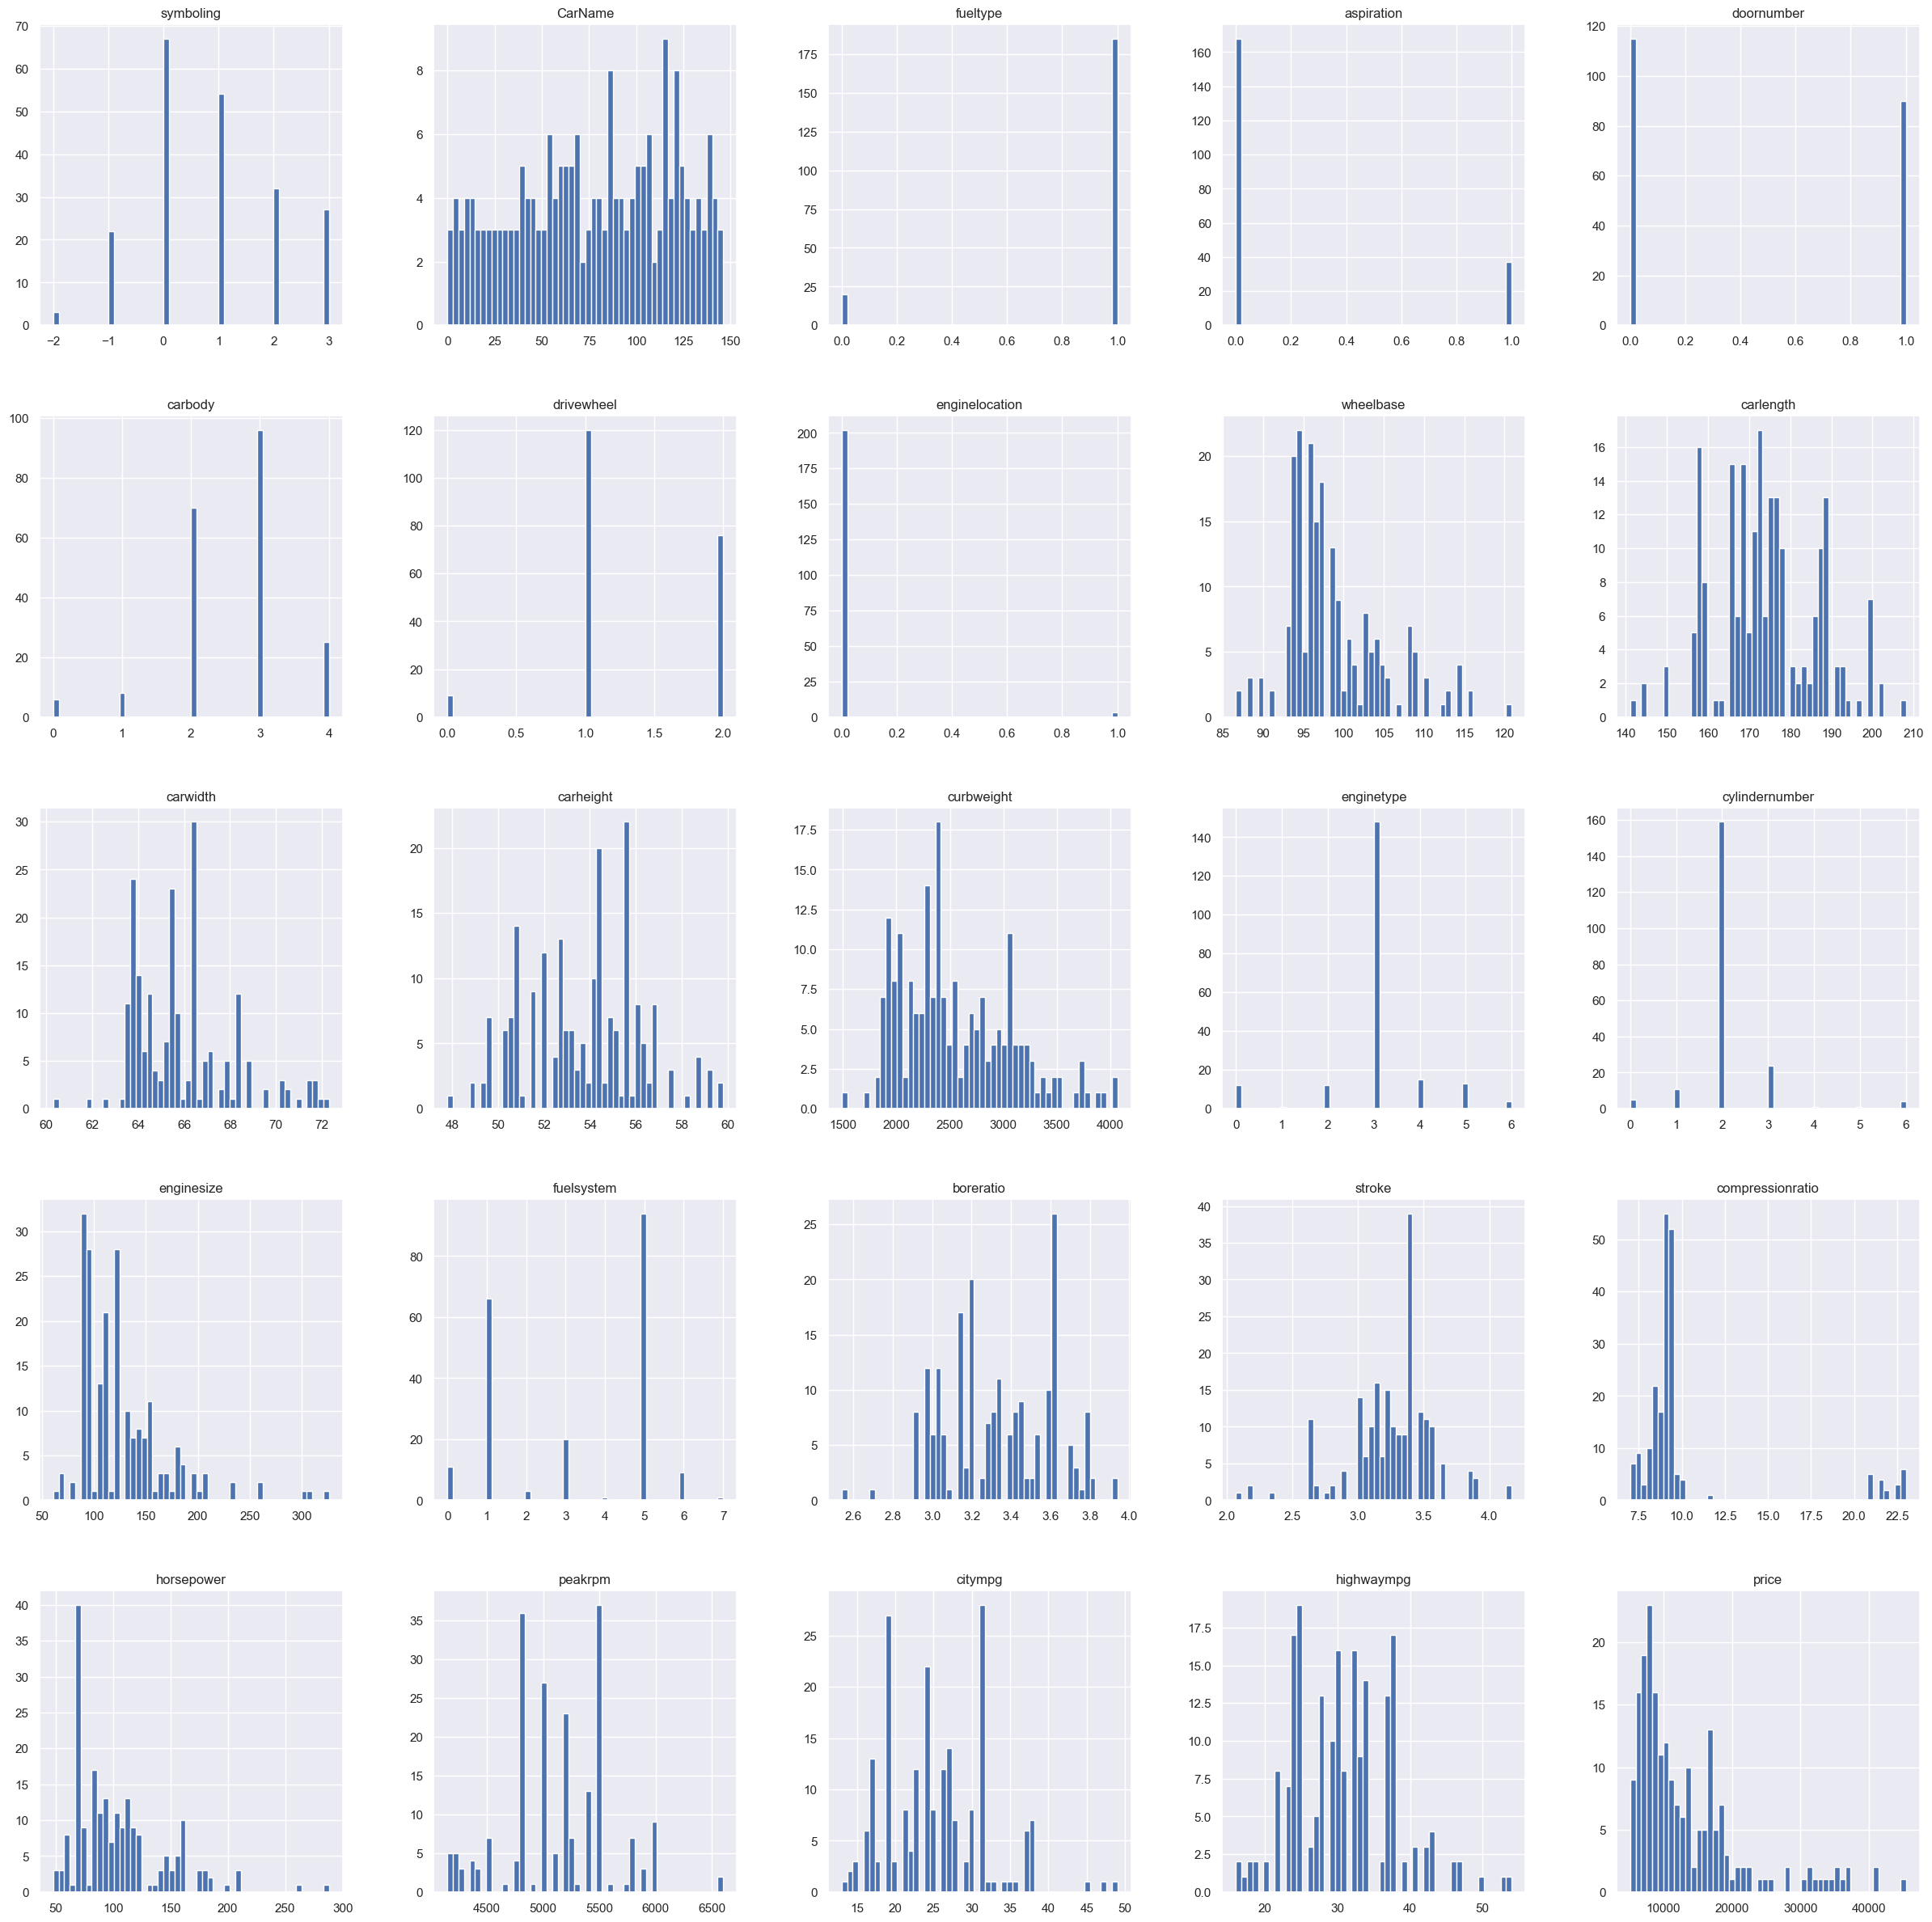

In [161]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

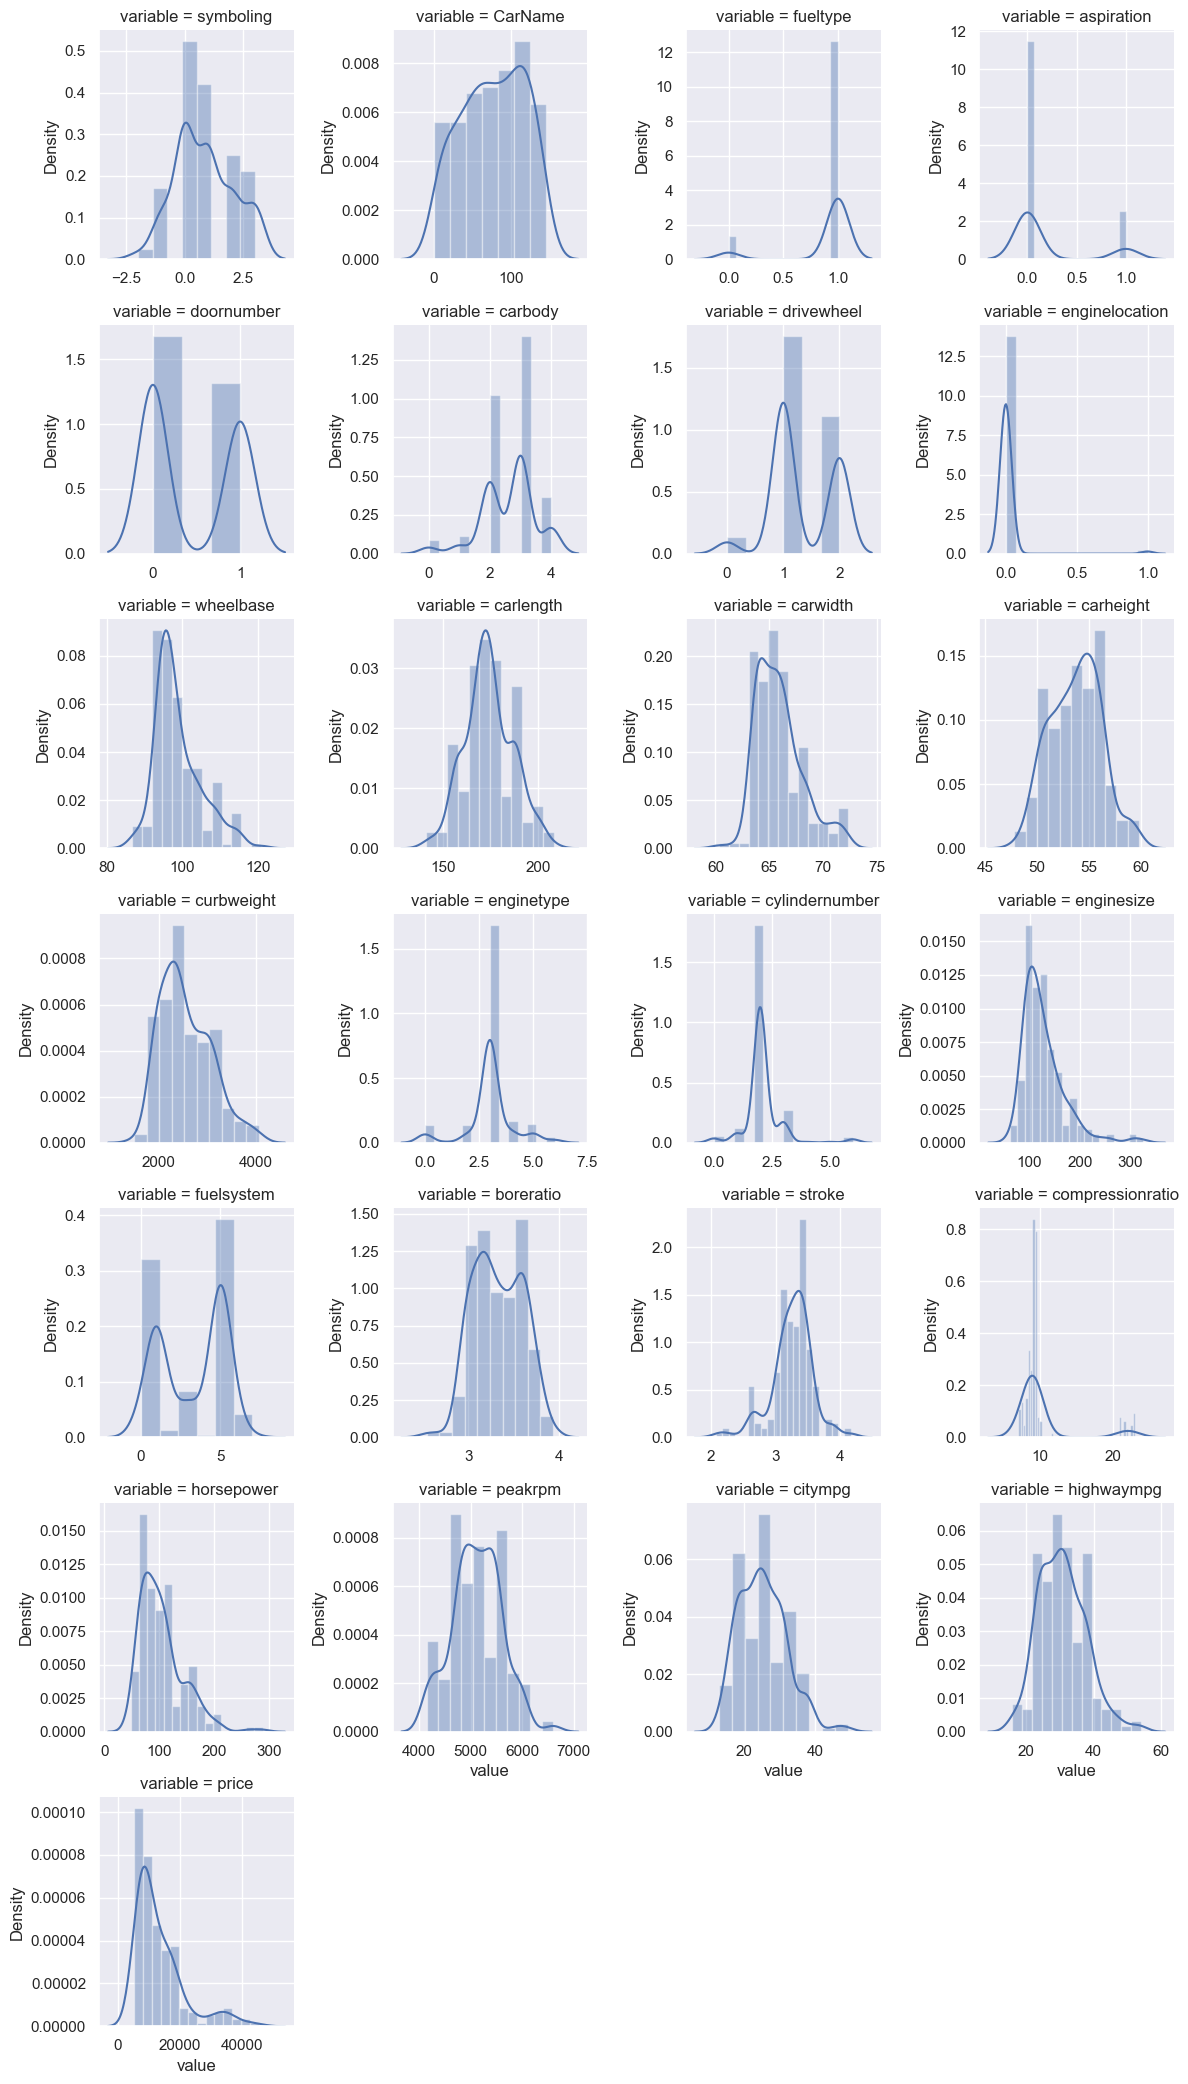

In [162]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 15 columns are positive skewed
2. 5 columns are neagtive skewed
2. 1 column is added here i.e price which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables
All the negative skewed columns are those which are encoded so we will not transform them as it will not affect the accuracy.

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [163]:
#+ve skewed 
df['price'].skew()

1.7776781560914454

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

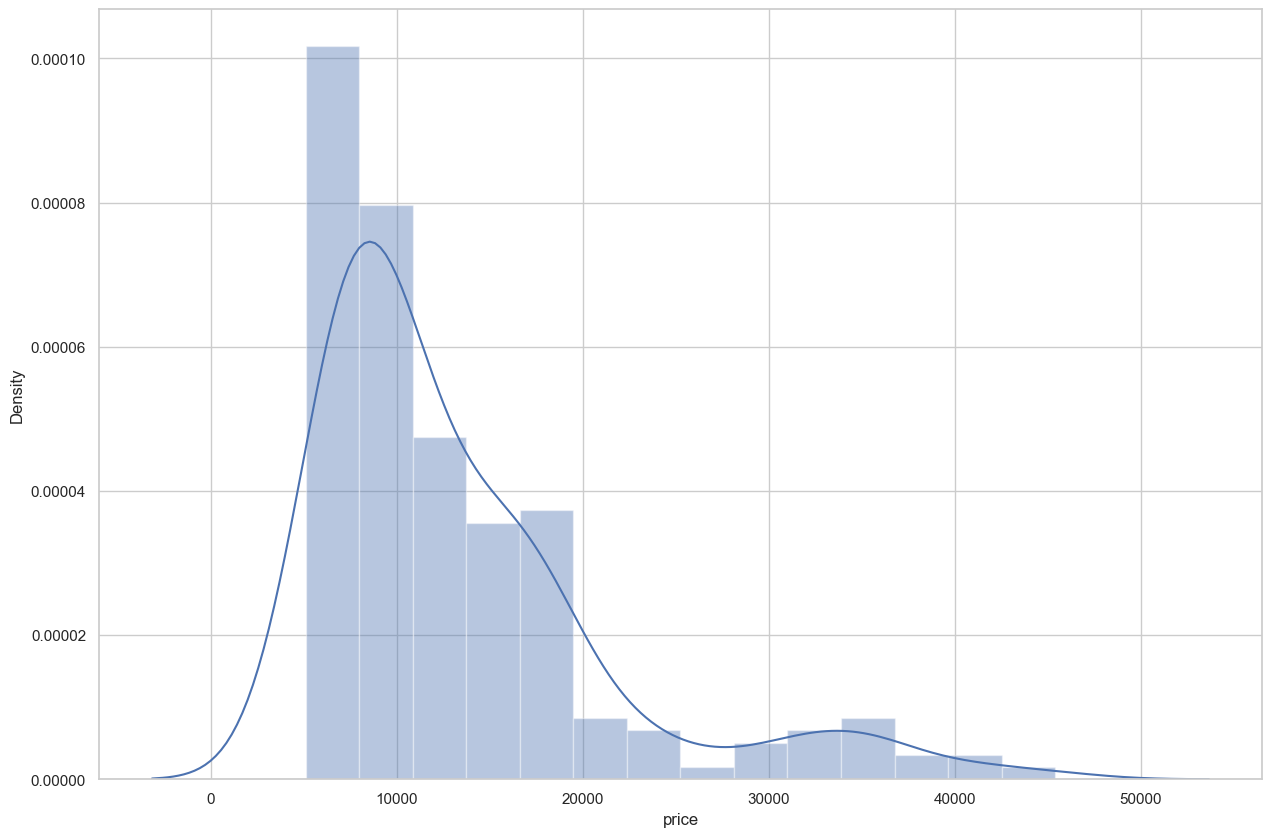

In [164]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.price)
plt.show()

### From the above graph we can observe that price of the most of the cars is between the range 10000-15000 according to dataset.
#### The average price of the cars is 13276 in the dataset

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



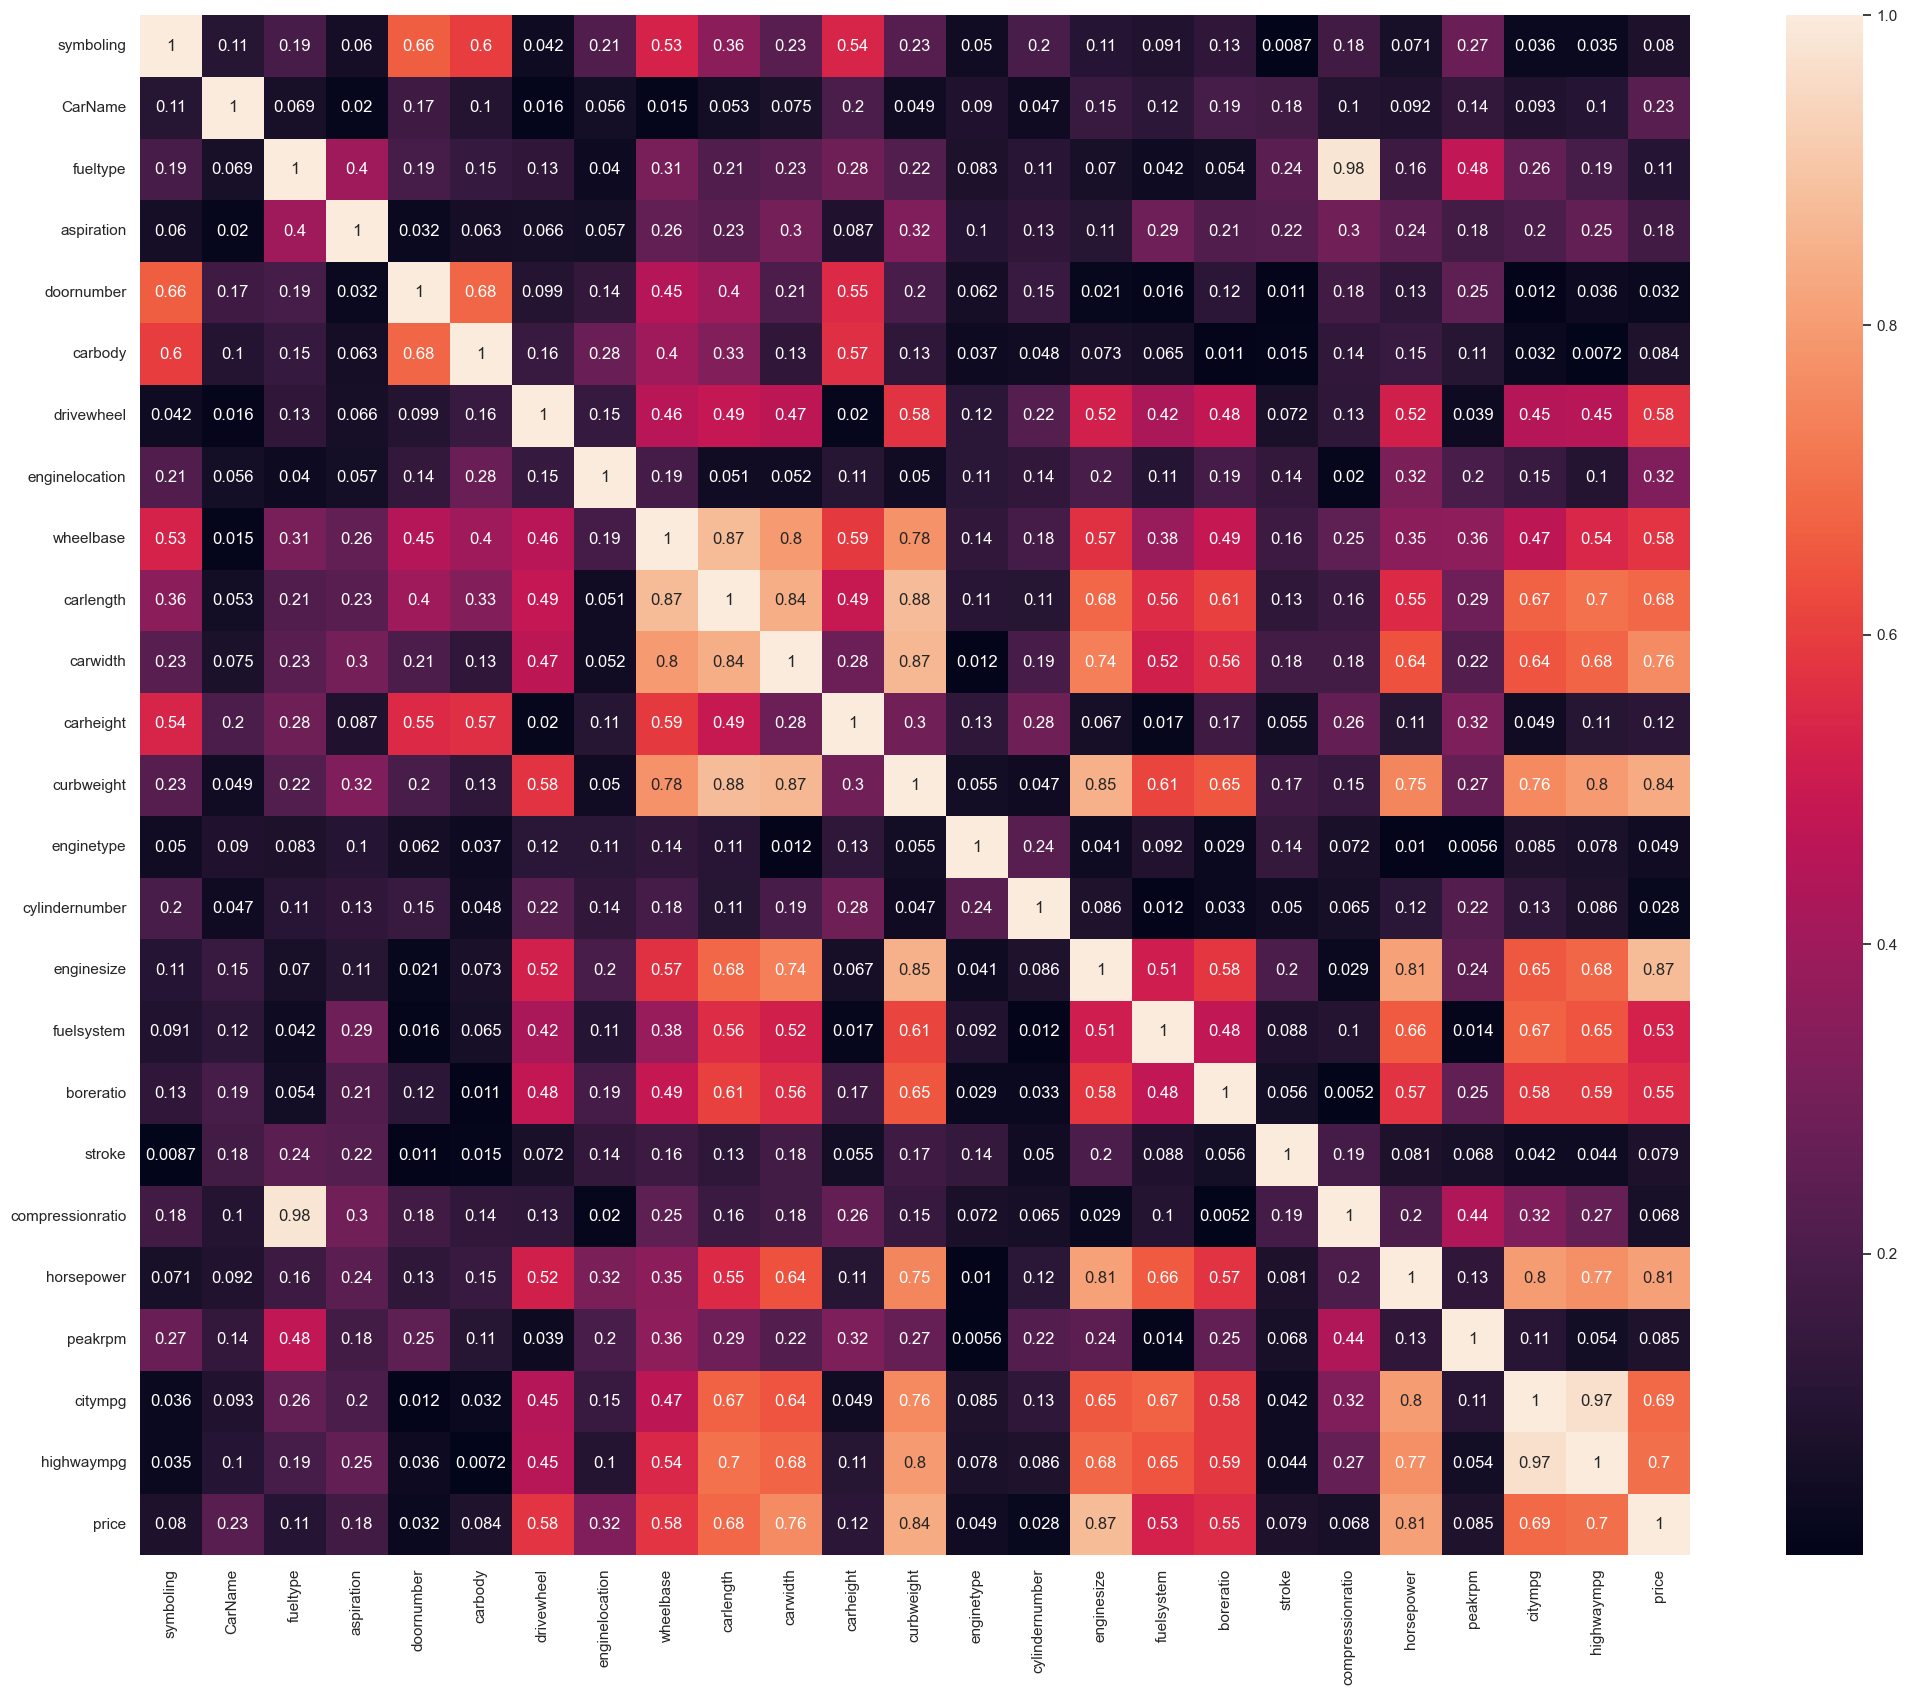

In [165]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [166]:
print (corr['price'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['price'].sort_values(ascending=False)[-5:]) #last 5 values`

price             1.000000
enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
highwaympg        0.697599
citympg           0.685751
carlength         0.682920
drivewheel        0.577992
wheelbase         0.577816
boreratio         0.553173
fuelsystem        0.526823
enginelocation    0.324973
CarName           0.231439
aspiration        0.177926
Name: price, dtype: float64 

----------------------
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
doornumber          0.031835
cylindernumber      0.027628
Name: price, dtype: float64


Here we observe that the 5 features named stroke,compressionratio,enginetype,doornumber,cylindernumber are less correlated to the target variable so we will drop them. 

In [167]:
corr

symboling   CarName  fueltype  aspiration  doornumber  \
symboling          1.000000  0.107095  0.194311    0.059866    0.664073   
CarName            0.107095  1.000000  0.069435    0.019914    0.171745   
fueltype           0.194311  0.069435  1.000000    0.401397    0.191491   
aspiration         0.059866  0.019914  0.401397    1.000000    0.031792   
doornumber         0.664073  0.171745  0.191491    0.031792    1.000000   
carbody            0.596135  0.099691  0.147853    0.063028    0.680358   
drivewheel         0.041671  0.016129  0.132257    0.066465    0.098954   
enginelocation     0.212471  0.055968  0.040070    0.057191    0.137757   
wheelbase          0.531954  0.014550  0.308346    0.257611    0.447357   
carlength          0.357612  0.053016  0.212679    0.234539    0.398568   
carwidth           0.232919  0.075349  0.233880    0.300567    0.207168   
carheight          0.541038  0.201900  0.284631    0.087311    0.552208   
curbweight         0.227691  0.049407  0.217275    0.324902    0.197379   
enginetype         0.050372  0.090381  0.082695    0.102963    0.062431   
cylindernumber     0.197762  0.047154  0.110617    0.133119    0.154322   
enginesize         0.105790  0.153982  0.069594    0.108217    0.020742   
fuelsystem         0.091163  0.123845  0.041529    0.288086    0.015519   
boreratio          0.130051  0.188598  0.054451    0.212614    0.119258   
stroke             0.008735  0.181775  0.241829    0.222982    0.011082   
compressionratio   0.178515  0.101730  0.984356    0.295541    0.177888   
horsepower         0.070873  0.092131  0.163926    0.241685    0.126947   
peakrpm            0.273606  0.138309  0.476883    0.183383    0.247668   
citympg            0.035823  0.093437  0.255963    0.202362    0.012417   
highwaympg         0.034606  0.102895  0.191392    0.254416    0.036330   
price              0.079978  0.231439  0.105679    0.177926    0.031835   

                   carbody  drivewheel  enginelocation  wheelbase  carlength  \
symboling         0.596135    0.041671        0.212471   0.531954   0.357612   
CarName           0.099691    0.016129        0.055968   0.014550   0.053016   
fueltype          0.147853    0.132257        0.040070   0.308346   0.212679   
aspiration        0.063028    0.066465        0.057191   0.257611   0.234539   
doornumber        0.680358    0.098954        0.137757   0.447357   0.398568   
carbody           1.000000    0.155745        0.277009   0.401362   0.334433   
drivewheel        0.155745    1.000000        0.147865   0.459745   0.485649   
enginelocation    0.277009    0.147865        1.000000   0.187790   0.050989   
wheelbase         0.401362    0.459745        0.187790   1.000000   0.874587   
carlength         0.334433    0.485649        0.050989   0.874587   1.000000   
carwidth          0.131710    0.470751        0.051698   0.795144   0.841118   
carheight         0.568534    0.019719        0.106234   0.589435   0.491029   
curbweight        0.128467    0.575111        0.050468   0.776386   0.877728   
enginetype        0.037024    0.116823        0.114127   0.135577   0.113291   
cylindernumber    0.048408    0.223238        0.135541   0.184596   0.109585   
enginesize        0.073352    0.524307        0.196826   0.569329   0.683360   
fuelsystem        0.065079    0.424686        0.105971   0.384601   0.557810   
boreratio         0.010549    0.481827        0.185042   0.488750   0.606454   
stroke            0.015325    0.071591        0.138455   0.160959   0.129533   
compressionratio  0.136243    0.127479        0.019762   0.249786   0.158414   
horsepower        0.153928    0.518686        0.317839   0.353294   0.552623   
peakrpm           0.109643    0.039417        0.198461   0.360469   0.287242   
citympg           0.031697    0.449581        0.153487   0.470414   0.670909   
highwaympg        0.007170    0.452220        0.102026   0.544082   0.704662   
price             0.083976    0.577992        0.324973   0.577816  

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

These are the columns that we have to drop. 

In [168]:
#Here we are droping those columns
df = df.drop(['stroke','compressionratio','enginetype','doornumber','cylindernumber'], axis=1)

In [169]:
df.head()

symboling  CarName  fueltype  aspiration  carbody  drivewheel  \
0          3        2         1           0        0           2   
1          3        3         1           0        0           2   
2          1        1         1           0        2           2   
3          2        4         1           0        3           1   
4          2        5         1           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0               0       88.6      168.8      64.1       48.8        2548   
1               0       88.6      168.8      64.1       48.8        2548   
2               0       94.5      171.2      65.5       52.4        2823   
3               0       99.8      176.6      66.2       54.3        2337   
4               0       99.4      176.6      66.4       54.3        2824   

   enginesize  fuelsystem  boreratio  horsepower  peakrpm  citympg  \
0         130           5       3.47         111     5000       21   
1         130           5       3.47         111     5000       21   
2         152           5       2.68         154     5000       19   
3         109           5       3.19         102     5500       24   
4         136           5       3.19         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       205 non-null    int64  
 1   CarName         205 non-null    int32  
 2   fueltype        205 non-null    int32  
 3   aspiration      205 non-null    int32  
 4   carbody         205 non-null    int32  
 5   drivewheel      205 non-null    int32  
 6   enginelocation  205 non-null    int32  
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  carheight       205 non-null    float64
 11  curbweight      205 non-null    int64  
 12  enginesize      205 non-null    int64  
 13  fuelsystem      205 non-null    int32  
 14  boreratio       205 non-null    float64
 15  horsepower      205 non-null    int64  
 16  peakrpm         205 non-null    int64  
 17  citympg         205 non-null    int

# 4. Boxplot

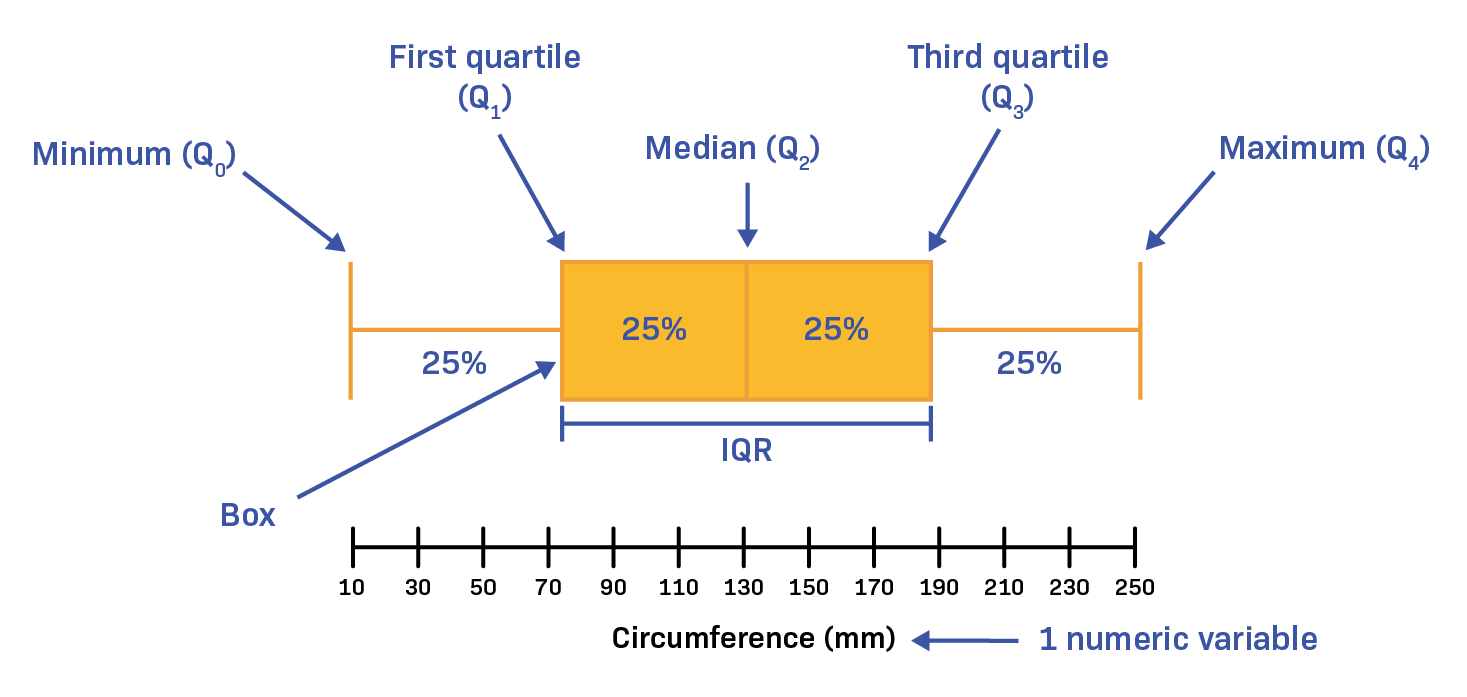

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [171]:
features = df.columns.tolist()

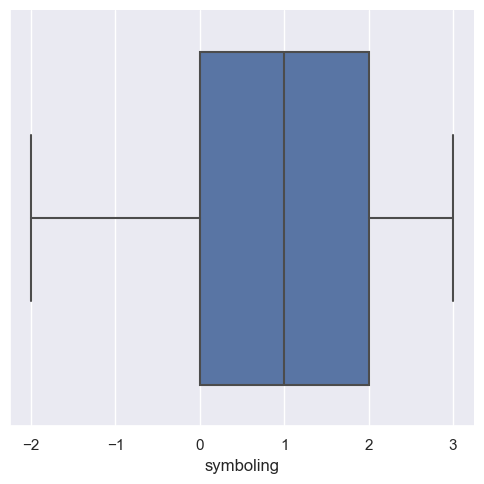

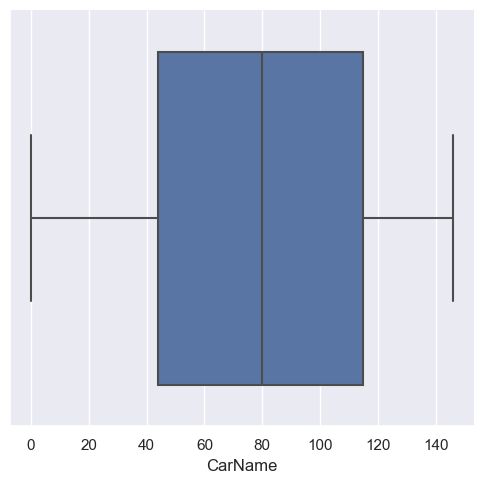

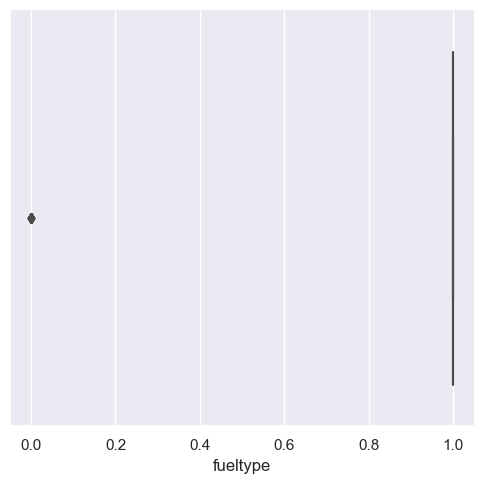

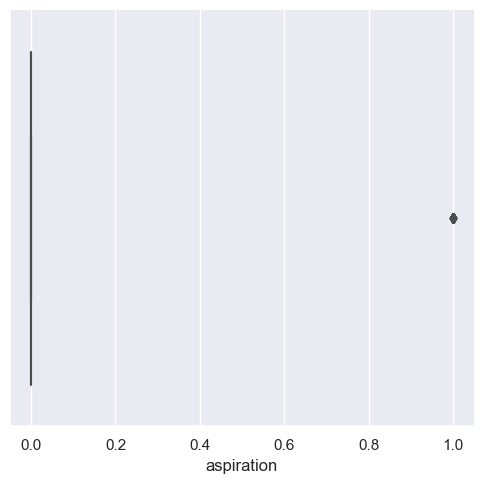

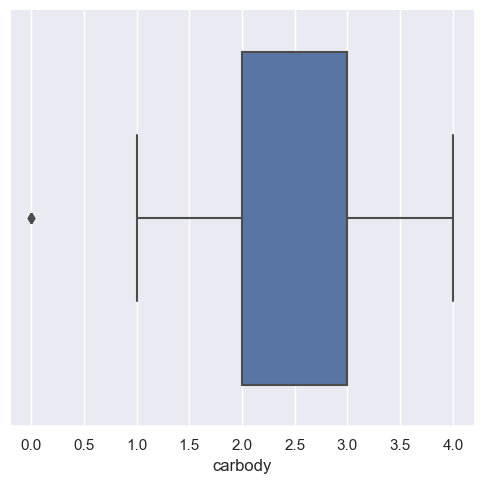

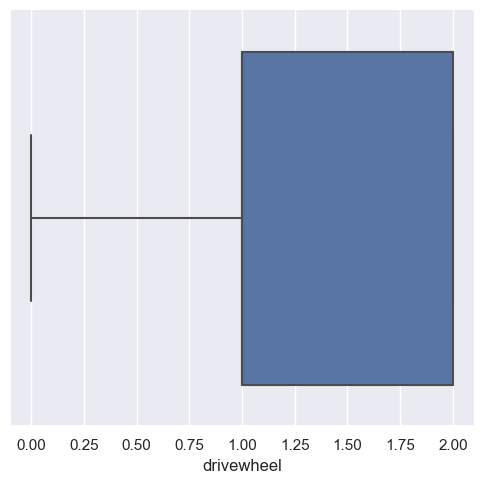

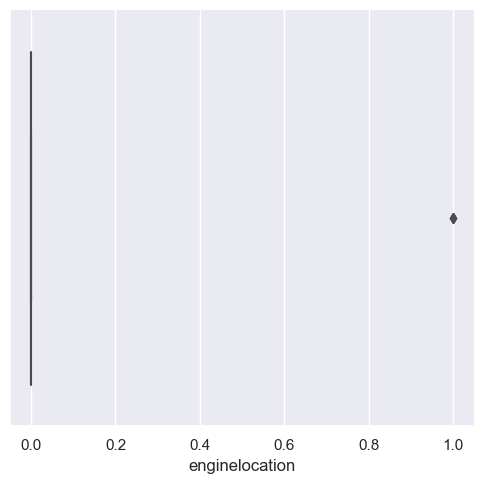

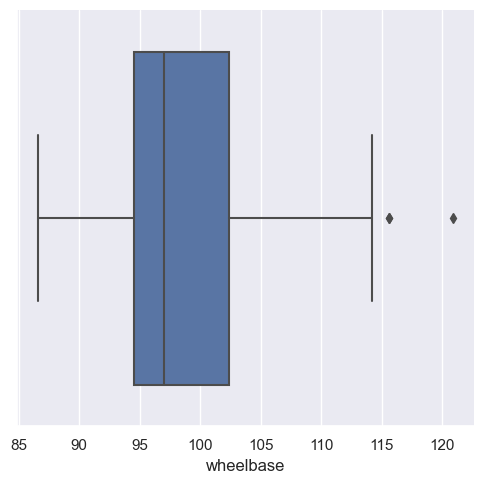

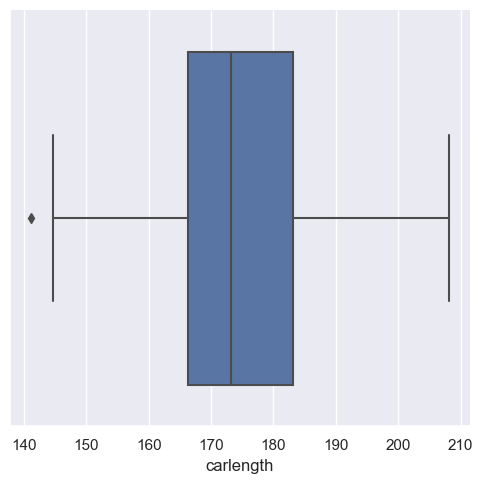

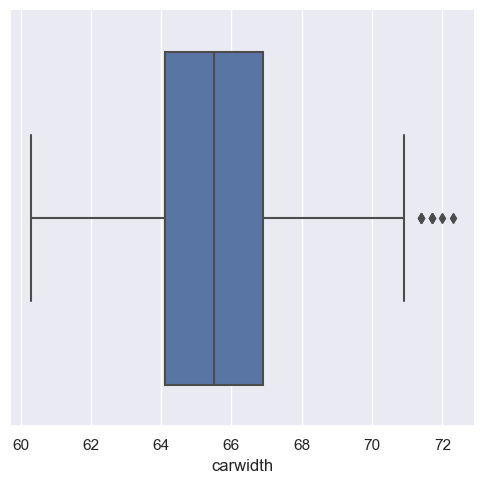

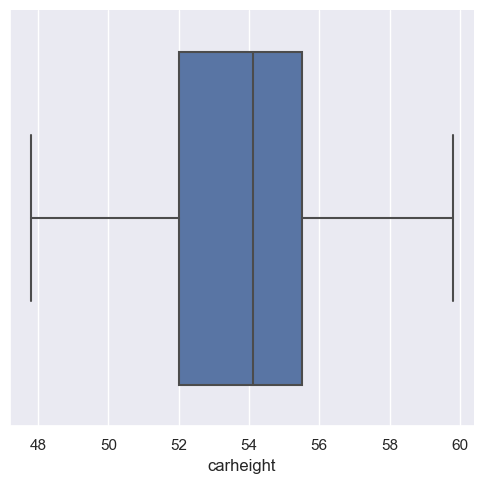

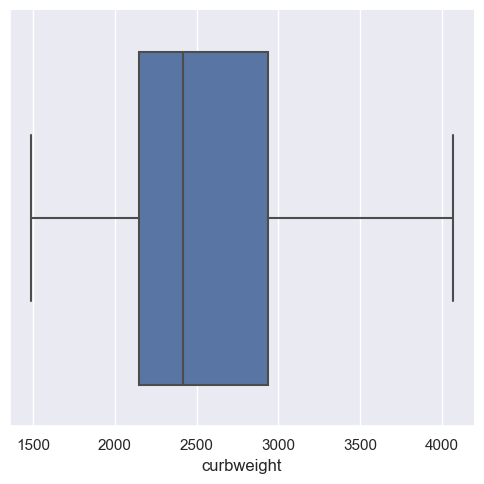

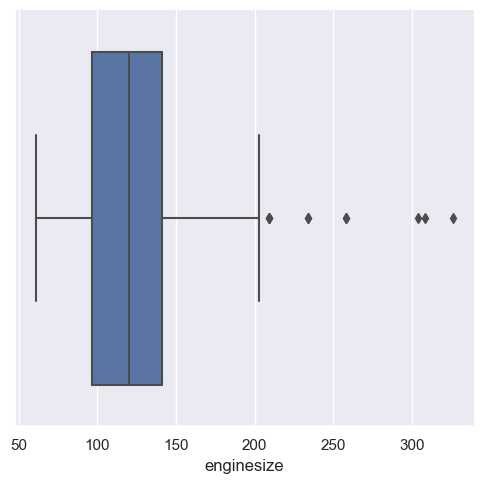

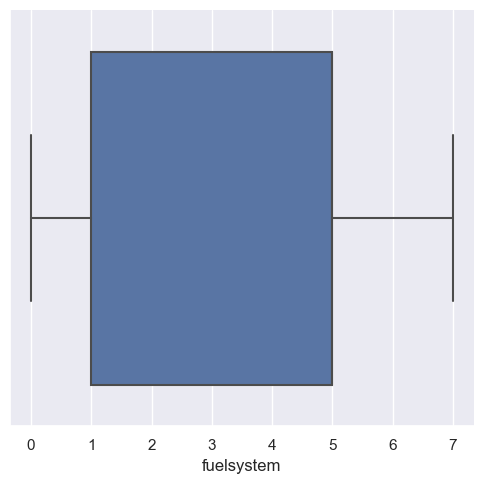

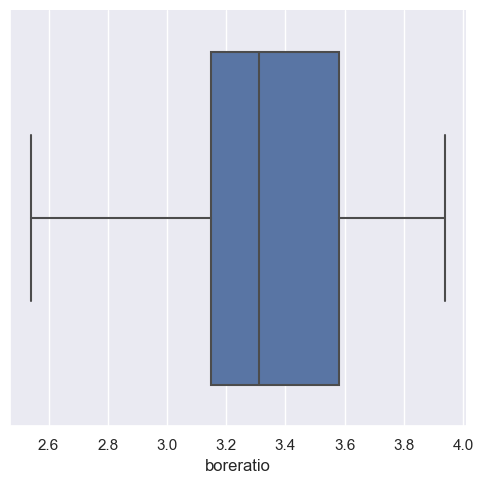

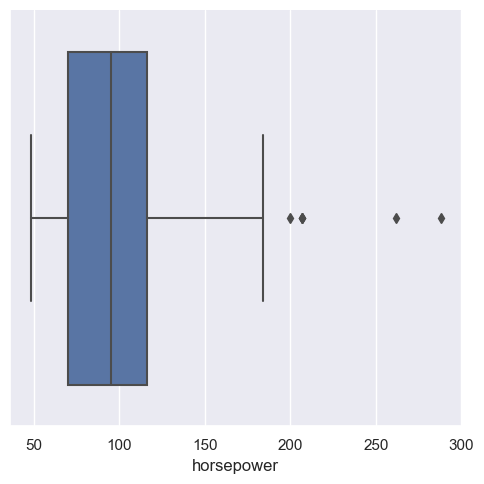

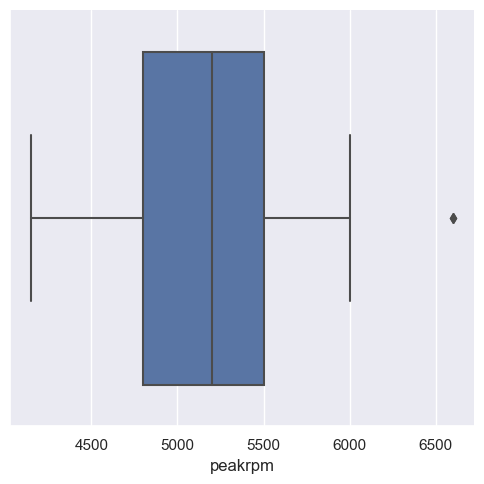

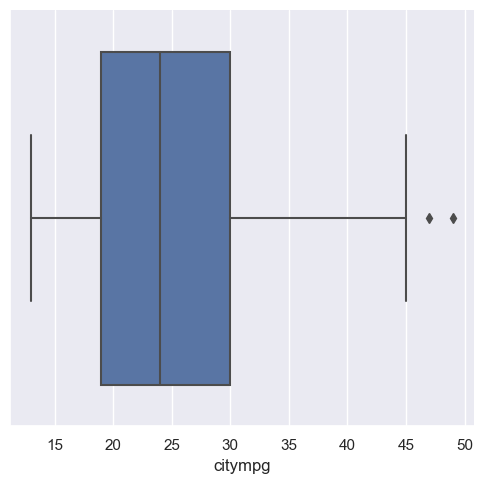

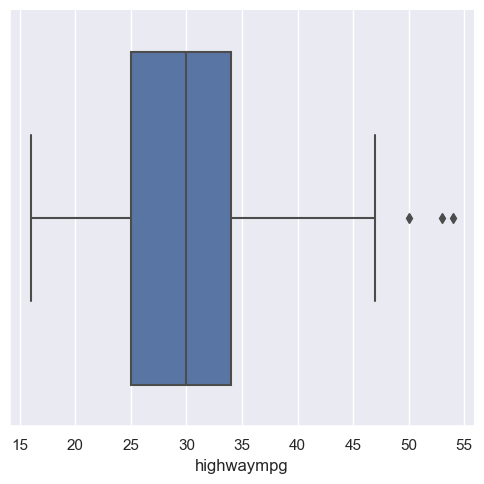

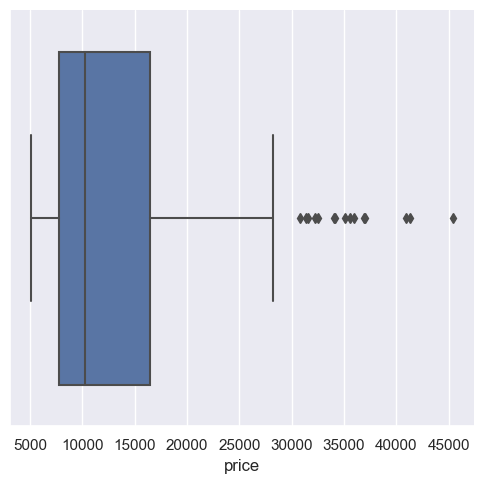

In [172]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

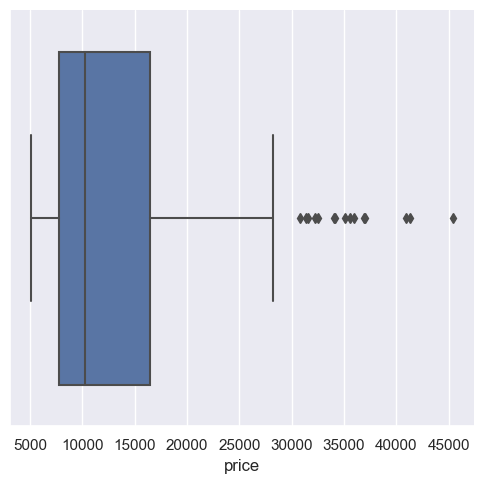

In [173]:
#for target variable
sns.catplot(data=df, x='price', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# 5. Scatter Plot

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs or scatter diagrams.

In [174]:
import plotly.express as px
for value in features:
    figure = px.scatter(data_frame= df,x = value,y = 'price',trendline = 'ols')
    
    figure.show()

The line between both th variables is called Best Fir Line.The least Sum of Squares of Errors is used as the cost function for Linear Regression. For all possible lines, calculate the sum of squares of errors. The line which has the least sum of squares of errors is the best fit line.The line drawn in a scatter plot, which is near to almost all the points in the plot is known as “line of best fit” or “trend line“. 

### Scatter Plot insight:

We can observe that various variables like carwidth,curbweight,etc shows continous increase in price. Which relates that these variables are highly correlated with the target variables.

### Why use Scatter plot? 

Scatter plots are used in either of the following situations.

- When we have paired numerical data
- When there are multiple values of the dependent variable for a unique value of an independent variable
- In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, checking whether two products that appear to be related both occur with the exact cause and so on.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [175]:
# Separate target and feature column in X and y variable

target = 'price'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

In [176]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       205 non-null    int64  
 1   CarName         205 non-null    int32  
 2   fueltype        205 non-null    int32  
 3   aspiration      205 non-null    int32  
 4   carbody         205 non-null    int32  
 5   drivewheel      205 non-null    int32  
 6   enginelocation  205 non-null    int32  
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  carheight       205 non-null    float64
 11  curbweight      205 non-null    int64  
 12  enginesize      205 non-null    int64  
 13  fuelsystem      205 non-null    int32  
 14  boreratio       205 non-null    float64
 15  horsepower      205 non-null    int64  
 16  peakrpm         205 non-null    int64  
 17  citympg         205 non-null    int

In [177]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [178]:
# Check the shape of X and y variable
X.shape, y.shape

((205, 19), (205,))

In [179]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [180]:
# Again check the shape of X and y variable
X.shape, y.shape

((205, 19), (205, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [181]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 19), (41, 19), (164, 1), (41, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different regression algorithms. As we know that our target variable is in continuous format so we have to apply regression algorithm. Target variable is a continous value.In our dataset we have the outcome variable or Dependent variable i.e Price. So we will use Regression algorithm**

__Algorithms we are going to use in this step__

1. Linear Regression
2. Lasso Regression
3. Rigde Regression

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [183]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

#### Train set cross-validation 

In [184]:
#Using linear regression on our training data 
from sklearn.linear_model import LinearRegression

In [185]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [186]:
#Accuracy check of trainig data

#Get R2 score
reg.score(X_train, y_train)


0.8951336604669019

In [187]:
#Accuracy of test data
reg.score(X_test, y_test) 

0.8525378568644568

In [188]:
# Getting kfold values
lg_scores = -1 * cross_val_score(reg, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([2603.88950517, 3053.5007184 , 3713.91696088, 2556.73092526,
       2999.07545216, 2441.17364592, 2678.6841161 , 2152.20328063,
       2400.90244159, 3814.87014777])

In [189]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

2841.494719386382

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [190]:
# Predict the values on X_test_scaled dataset 
y_predicted = reg.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

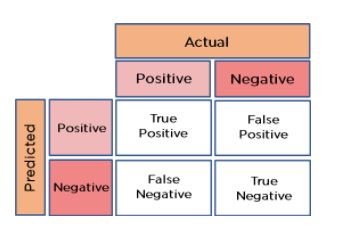

#### This diagram helps in understanding the concept of confusion matrix. 

### Evaluating all kinds of evaluating parameters.

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [191]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error  

print("The model used is Linear Regression")
  
l_acc = r2_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  

The model used is Linear Regression

The accuracy is: 0.8525378568644568


As the data is continuous we cannot create confusion matrix and other evaluating parameters.

# 2. Lasso Regression

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [192]:
#Using Lasso Regression
from sklearn import linear_model
lreg = linear_model.Lasso(alpha=0.1)
lreg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [193]:
#Accuracy check of trainig data
#Get R2 score
lreg.score(X_train, y_train)

0.895133630158243

In [194]:
#Accuracy of test data
lreg.score(X_test, y_test) 

0.8525559844166215

In [195]:
#Get kfold values
Nn_scores = -1 * cross_val_score(lreg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([2603.9524767 , 3053.11535876, 3713.63481519, 2556.41430523,
       2999.12593333, 2439.14126933, 2678.68780793, 2152.65473699,
       2400.43866391, 3815.11453614])

In [196]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

2841.2279903499307

### Prediction

In [197]:
# Predict the values on X_test_scaled dataset 
y_predicted = lreg.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [198]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Lasso Regression")
  
k_acc = r2_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))   

The model used is Lasso Regression

The accuracy is: 0.8525559844166215


# 3. Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. It has been used in many fields including econometrics, chemistry, and engineering.

In [199]:
#Using Ridge Regression

from sklearn.linear_model import Ridge
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rig = Ridge(alpha=1.0)
rig.fit(X_train, y_train)


Ridge()

In [200]:
#Accuracy check of trainig data
#Get R2 score
rig.score(X_train, y_train)

0.8909608927854165

In [201]:
#Accuracy of test data
rig.score(X_test, y_test) 

0.855316602551067

In [202]:
# Get kfold values
Dta_scores = -1 * cross_val_score(rig, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores


array([2648.79852934, 3033.80802558, 3500.6445363 , 2473.12091482,
       3065.32351067, 2658.03955425, 2687.97440237, 2606.76017905,
       2272.73113273, 4094.86453789])

In [203]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

2904.2065322981134

### Prediction 

In [204]:
# predict the values on X_test_scaled dataset 
y_predicted = rig.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [205]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Ridge Regression")
  
r_acc = r2_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(r_acc))

The model used is Ridge Regression

The accuracy is 0.855316602551067


# Insight: -

In [206]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression',
                  'Ridge Regression']
cal_metric

Score in percentage
Linear Regression             0.852538
Lasso Regression              0.852556
Ridge Regression              0.855317


- As you can see that all the models have the same accuracy. We will prefer Linear Regression to save our model.


# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [207]:
import pickle
pickle.dump(reg , open('Car_Price_Prediction_LinearRegression.pkl', 'wb'))
pickle.dump(lreg , open('Car_Price_Prediction_LassoRegression.pkl', 'wb'))
pickle.dump(rig , open('Car_Price_Prediction_RidgeRegression.pkl', 'wb'))

In [208]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('C:/My Sample Notebook/Notebook Template/Car Price Prediction/model/Car_Price_Prediction_LinearRegression.pkl', 'rb'))
    Price = str(list(pickled_model.predict(features)))
    
    return str(f'The Price is {Price}')

#### We can test our model by giving our own parameters or features to predict. 

In [209]:
symboling = 3
CarName=6
fueltype=1
aspiration=0
carbody =1  
drivewheel=2
enginelocation=0
wheelbase=100.6
carlength=180.8
carwidth=60.8
carheight=60.8
curbweight=3000
enginesize=150
fuelsystem=5
boreratio=3.47
horsepower=200
peakrpm=8000
citympg=30
highwaympg=50

In [210]:
print(model_prediction([[symboling,CarName,fueltype, aspiration, carbody,
       drivewheel, enginelocation, wheelbase, carlength, carwidth,
       carheight, curbweight, enginesize, fuelsystem, boreratio,
       horsepower, peakrpm, citympg, highwaympg]]))

The Price is [array([21858.06870817])]


# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in predicting the price of the Car. It helps the customer to analyze the price of various cars and select the most appropriate for them according to their budget  